In [40]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

In [23]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [24]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
# print(H.shape)
# print(K.shape)
Pair_1 = np.concatenate((H,K))
# print(Pair_1.shape)

In [36]:
variance_feature_16 = {}
for i in range(1,17):
    variance_feature_16.update({i: np.var(Pair_1[:,i])})
variance_feature_16 = sorted(variance_feature_16.items(), key=lambda x: x[1], reverse=True)
print(variance_feature_16)
# print(type(variance_feature_16))
print(np.var(variance_feature_16))

[(8, 14.061078595529672), (2, 11.020182704844741), (9, 4.981988994939016), (3, 4.86991509077861), (15, 4.843402102290178), (4, 4.803382357888849), (5, 4.779304696577287), (1, 3.6110223903538246), (11, 3.521975325029081), (6, 3.264439015194985), (16, 2.5557357623924353), (10, 2.5488455009819386), (12, 2.5476471946496306), (13, 2.102351030935212), (7, 1.0869523336785107), (14, 1.0191853452666144)]
20.259246397612046


In [26]:
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
Pair_2 = np.concatenate((M,Y))
#print(Pair_2.shape)

In [37]:
variance_feature_16 = {}
for i in range(1,17):
    variance_feature_16.update({i: np.var(Pair_2[:,i])})
variance_feature_16 = sorted(variance_feature_16.items(), key=lambda x: x[1], reverse=True)
print(variance_feature_16)
print(np.var(variance_feature_16))

[(13, 12.236742615911615), (2, 10.679228893483115), (8, 10.104733816208514), (5, 7.909484579636703), (11, 7.3278009898460725), (14, 6.99459978056972), (4, 6.257578860793441), (15, 5.4415594012090445), (3, 5.017445194619876), (7, 4.8355015332816205), (9, 4.468304282104542), (1, 4.433450437816422), (6, 3.9887975666684956), (10, 3.915701237387994), (16, 2.78083630913654), (12, 2.0455293877636143)]
15.926576680764768


In [28]:
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Pair_3 = np.concatenate((F,X))
# print(Pair_3.shape)

In [38]:
variance_feature_16 = {}
for i in range(1,17):
    variance_feature_16.update({i: np.var(Pair_3[:,i])})
variance_feature_16 = sorted(variance_feature_16.items(), key=lambda x: x[1], reverse=True)
print(variance_feature_16)
print(np.var(variance_feature_16))

[(2, 10.846988987820545), (10, 5.891470520246411), (6, 5.458850647828246), (4, 4.710581906056309), (7, 4.665608129044246), (15, 4.535841225914389), (11, 4.314875869112933), (3, 3.8767052319737747), (5, 3.766999857367889), (9, 3.588374092769843), (1, 3.016260465833061), (12, 2.7648046350504525), (13, 2.101598298907684), (16, 1.8518970885023918), (8, 1.7793760584693135), (14, 1.2326070847152473)]
18.05136977768701


# Pair 1: H and K

In [58]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [59]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
# print(H.shape)
# print(K.shape)
Pair_1 = np.concatenate((H,K))
# print(Pair_1.shape)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(Pair_1[:,1:], Pair_1[:,0], test_size=0.1, random_state=0)
# print(X_train.shape)
# print(X_val.shape)
# print(y_train.shape)
# print(y_val.shape)

## Method 1: KNN

Index: 1, Time: 0.09399843215942383s, N_Neighbors: 1, Accuracy: [0.96226415 0.95471698 0.9509434  0.96603774 0.96981132], Mean: 0.9607547169811321
Index: 2, Time: 0.20399928092956543s, N_Neighbors: 3, Accuracy: [0.9509434  0.93584906 0.96603774 0.9509434  0.95849057], Mean: 0.9524528301886793
Index: 3, Time: 0.30198192596435547s, N_Neighbors: 5, Accuracy: [0.93962264 0.93207547 0.96603774 0.96226415 0.96603774], Mean: 0.9532075471698114
Index: 4, Time: 0.4077324867248535s, N_Neighbors: 7, Accuracy: [0.94339623 0.93962264 0.95471698 0.95849057 0.96226415], Mean: 0.9516981132075472
Index: 5, Time: 0.5078279972076416s, N_Neighbors: 9, Accuracy: [0.92830189 0.93207547 0.9509434  0.95849057 0.9509434 ], Mean: 0.9441509433962263


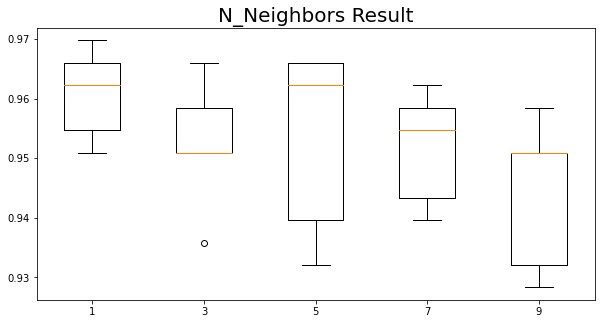

In [5]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.09899711608886719s, Weights: uniform, Accuracy: [0.93962264 0.93207547 0.96603774 0.96226415 0.96603774], Mean: 0.9532075471698114
Index: 2, Time: 0.1529984474182129s, Weights: distance, Accuracy: [0.9509434  0.93207547 0.96603774 0.96226415 0.96603774], Mean: 0.9554716981132076


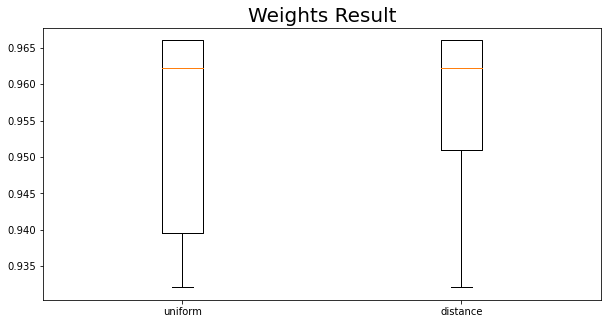

In [6]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.10399317741394043s, Algorithm: auto, Accuracy: [0.93962264 0.93207547 0.96603774 0.96226415 0.96603774], Mean: 0.9532075471698114
Index: 2, Time: 0.21318840980529785s, Algorithm: ball_tree, Accuracy: [0.93584906 0.94339623 0.95849057 0.96603774 0.96226415], Mean: 0.9532075471698114
Index: 3, Time: 0.31151771545410156s, Algorithm: kd_tree, Accuracy: [0.93584906 0.93584906 0.96603774 0.96226415 0.96226415], Mean: 0.9524528301886793
Index: 4, Time: 0.40151500701904297s, Algorithm: brute, Accuracy: [0.93962264 0.93207547 0.96603774 0.96226415 0.96603774], Mean: 0.9532075471698114


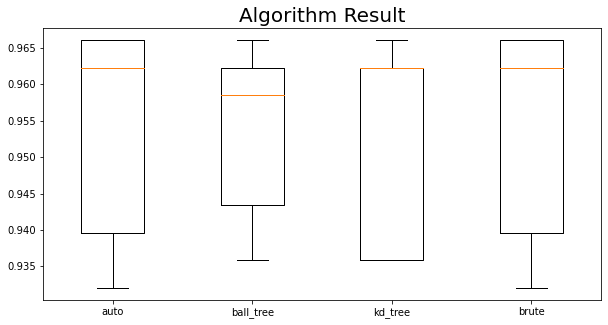

In [7]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

## Method 2: Decision Tree

In [8]:
'''
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
'''

"\nDecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')\n"

Index: 1, Time: 0.03699827194213867s, Criterion: gini, Accuracy: [0.9245283  0.94339623 0.92830189 0.93584906 0.92830189], Mean: 0.9320754716981133
Index: 2, Time: 0.06202816963195801s, Criterion: entropy, Accuracy: [0.93584906 0.93584906 0.96603774 0.95471698 0.9509434 ], Mean: 0.9486792452830188
Index: 3, Time: 0.07499575614929199s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

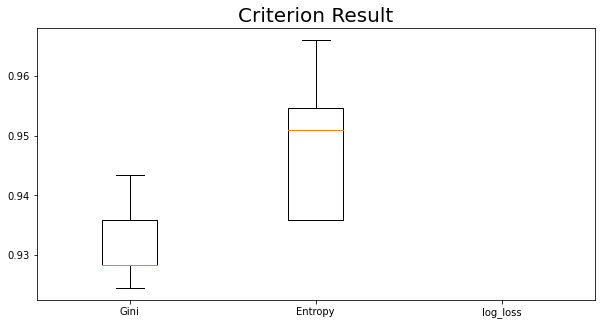

In [9]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = DecisionTreeClassifier(criterion=cri)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.031441450119018555s, Max_Depth: 10, Accuracy: [0.93207547 0.93207547 0.93584906 0.9509434  0.93962264], Mean: 0.9381132075471698
Index: 2, Time: 0.0594484806060791s, Max_Depth: 20, Accuracy: [0.93584906 0.93584906 0.92075472 0.93962264 0.94339623], Mean: 0.9350943396226417
Index: 3, Time: 0.09144306182861328s, Max_Depth: 30, Accuracy: [0.93207547 0.93962264 0.93207547 0.94339623 0.94339623], Mean: 0.9381132075471699
Index: 4, Time: 0.12144207954406738s, Max_Depth: 40, Accuracy: [0.93584906 0.9509434  0.91698113 0.9509434  0.93584906], Mean: 0.9381132075471698
Index: 5, Time: 0.1514439582824707s, Max_Depth: 50, Accuracy: [0.92830189 0.94716981 0.91698113 0.9509434  0.93962264], Mean: 0.9366037735849057


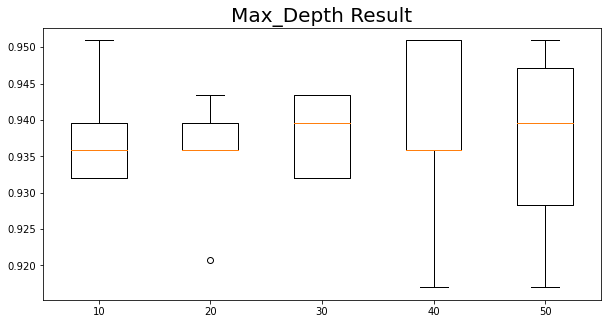

In [10]:
# max_depth_list = [5, 10, 15, 20, 25]
max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = DecisionTreeClassifier(max_depth = max_d)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '10','20', '30', '40', '50'
plt.boxplot(res, labels = labels)
plt.show()

## Method 3: Random Forest

Index: 1, Time: 0.8571851253509521s, Criterion: gini, Accuracy: [0.97358491 0.96226415 0.98490566 0.96226415 0.97358491], Mean: 0.9713207547169811
Index: 2, Time: 1.7000224590301514s, Criterion: entropy, Accuracy: [0.96226415 0.96981132 0.97735849 0.96603774 0.98113208], Mean: 0.9713207547169811
Index: 3, Time: 1.8419098854064941s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\21742\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\21742\anaconda3\lib\site-packages\jobli

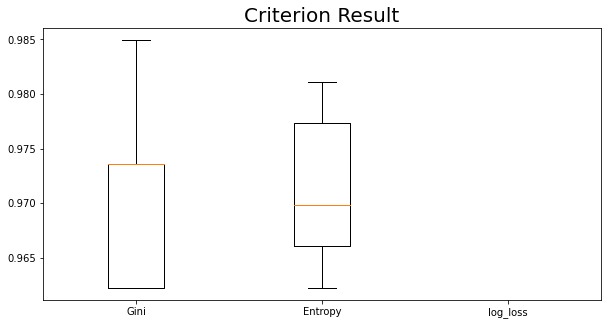

In [11]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = RandomForestClassifier(criterion = cri, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.9874799251556396s, Max_Depth: 5, Accuracy: [0.93584906 0.9245283  0.92830189 0.91320755 0.91698113], Mean: 0.9237735849056605
Index: 2, Time: 1.7555756568908691s, Max_Depth: 10, Accuracy: [0.97735849 0.95849057 0.97735849 0.96981132 0.98113208], Mean: 0.9728301886792453
Index: 3, Time: 2.526620864868164s, Max_Depth: 15, Accuracy: [0.97735849 0.96226415 0.98490566 0.96603774 0.97358491], Mean: 0.9728301886792453
Index: 4, Time: 3.286306858062744s, Max_Depth: 20, Accuracy: [0.97358491 0.96226415 0.98490566 0.96226415 0.97358491], Mean: 0.9713207547169811
Index: 5, Time: 4.081203460693359s, Max_Depth: 25, Accuracy: [0.97358491 0.96226415 0.98490566 0.96226415 0.97358491], Mean: 0.9713207547169811


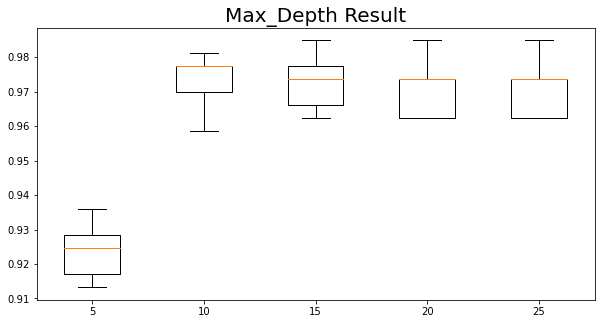

In [12]:
# max_depth_list = [2, 4, 6, 8, 10]
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = RandomForestClassifier(max_depth=max_d, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.06502151489257812s, N_Estimators: 5, Accuracy: [0.9509434  0.92830189 0.97358491 0.93584906 0.97358491], Mean: 0.9524528301886793
Index: 2, Time: 0.1723954677581787s, N_Estimators: 10, Accuracy: [0.96603774 0.96226415 0.95849057 0.95471698 0.95849057], Mean: 0.96
Index: 3, Time: 0.3061699867248535s, N_Estimators: 15, Accuracy: [0.96981132 0.96603774 0.98490566 0.97358491 0.96603774], Mean: 0.9720754716981131
Index: 4, Time: 0.47861456871032715s, N_Estimators: 20, Accuracy: [0.96981132 0.96226415 0.97735849 0.97358491 0.96603774], Mean: 0.969811320754717
Index: 5, Time: 0.704491376876831s, N_Estimators: 25, Accuracy: [0.97735849 0.96226415 0.98490566 0.96981132 0.96603774], Mean: 0.9720754716981131


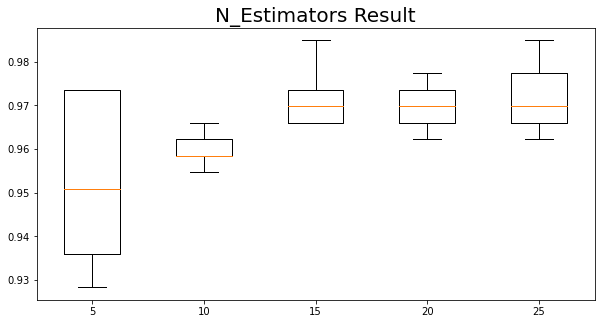

In [13]:
n_estimators_list = [5, 10 ,15 ,20 ,25]
cnt = 0
res = []
start = time.time()

for n_est in n_estimators_list:
    cnt += 1
    clf = RandomForestClassifier(n_estimators = n_est, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Estimators: {n_est}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Estimators Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 4: Support Vector Machine

Index: 1, Time: 0.21378135681152344s, Kernel: linear, Accuracy: [0.93207547 0.92075472 0.93584906 0.92075472 0.9245283 ], Mean: 0.9267924528301886
Index: 2, Time: 0.32258009910583496s, Kernel: poly, Accuracy: [0.97358491 0.97358491 0.96603774 0.98490566 0.97358491], Mean: 0.9743396226415095
Index: 3, Time: 0.46794724464416504s, Kernel: rbf, Accuracy: [0.96226415 0.96603774 0.94716981 0.96981132 0.96226415], Mean: 0.9615094339622641
Index: 4, Time: 0.9429633617401123s, Kernel: sigmoid, Accuracy: [0.50943396 0.50943396 0.50566038 0.50566038 0.50566038], Mean: 0.5071698113207547


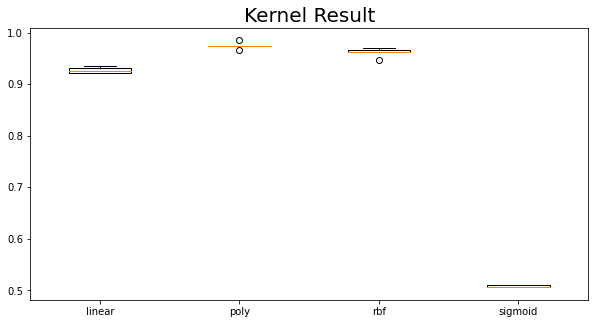

In [14]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
cnt = 0
res = []
start = time.time()

for ker in kernel_list:
    cnt += 1
    clf = SVC(kernel=ker)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Kernel: {ker}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Kernel Result',fontsize=20)
labels = 'linear', 'poly', 'rbf', 'sigmoid'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.23558855056762695s, C: 0.2, Accuracy: [0.93207547 0.93207547 0.94339623 0.94339623 0.95849057], Mean: 0.9418867924528304
Index: 2, Time: 0.4114537239074707s, C: 0.4, Accuracy: [0.94716981 0.96603774 0.95471698 0.97358491 0.95849057], Mean: 0.9600000000000002
Index: 3, Time: 0.5766637325286865s, C: 0.6, Accuracy: [0.95471698 0.96981132 0.95471698 0.96981132 0.96603774], Mean: 0.9630188679245283
Index: 4, Time: 0.7290143966674805s, C: 0.8, Accuracy: [0.95471698 0.96981132 0.9509434  0.97358491 0.96603774], Mean: 0.9630188679245283
Index: 5, Time: 0.8765668869018555s, C: 1.0, Accuracy: [0.96226415 0.96603774 0.94716981 0.96981132 0.96226415], Mean: 0.9615094339622641
Index: 6, Time: 1.0081682205200195s, C: 1.2, Accuracy: [0.96603774 0.96603774 0.94716981 0.97358491 0.96603774], Mean: 0.9637735849056603
Index: 7, Time: 1.1486682891845703s, C: 1.4, Accuracy: [0.96603774 0.96603774 0.95849057 0.97358491 0.96603774], Mean: 0.9660377358490566


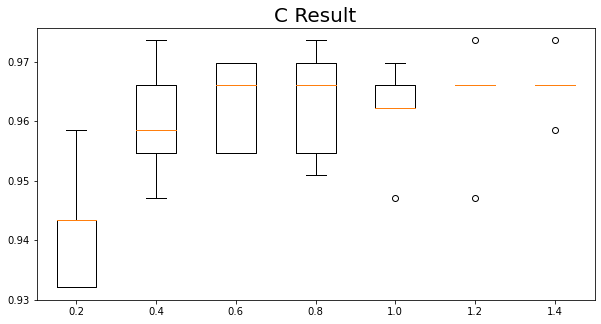

In [15]:
C_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
cnt = 0
res = []
start = time.time()

for c in C_list:
    cnt += 1
    clf = SVC(C = c, kernel = 'rbf')
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, C: {c}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('C Result',fontsize=20)
labels = '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'
plt.boxplot(res, labels = labels)
plt.show()

# Feature extraction (PCA)

In [61]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [62]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
# print(H.shape)
# print(K.shape)
Pair_1 = np.concatenate((H,K))
# print(Pair_1.shape)

In [63]:
X_train, X_val, y_train, y_val = train_test_split(Pair_1[:,1:], Pair_1[:,0], test_size=0.1, random_state=0)

In [64]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
# print(pca_result.shape)

## Method 1: KNN

Index: 1, Time: 0.05376601219177246s, N_Neighbors: 1, Accuracy: [0.90943396 0.8754717  0.88301887 0.89811321 0.8754717 ], Mean: 0.8883018867924528
Index: 2, Time: 0.3751487731933594s, N_Neighbors: 3, Accuracy: [0.90188679 0.87924528 0.90566038 0.9245283  0.8754717 ], Mean: 0.8973584905660378
Index: 3, Time: 0.44002532958984375s, N_Neighbors: 5, Accuracy: [0.89433962 0.8754717  0.92075472 0.93207547 0.89811321], Mean: 0.9041509433962265
Index: 4, Time: 0.48875904083251953s, N_Neighbors: 7, Accuracy: [0.89433962 0.86415094 0.90943396 0.94716981 0.90188679], Mean: 0.9033962264150943
Index: 5, Time: 0.5428731441497803s, N_Neighbors: 9, Accuracy: [0.88301887 0.86415094 0.90943396 0.93207547 0.91320755], Mean: 0.9003773584905661


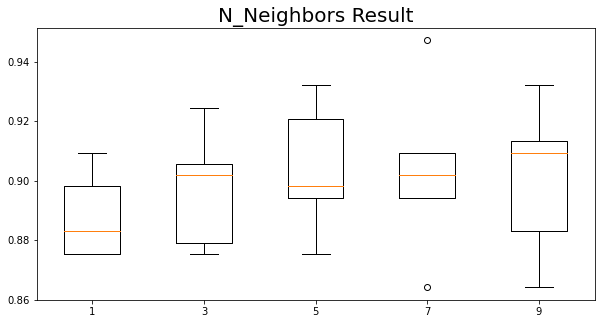

In [65]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.06420588493347168s, Weights: uniform, Accuracy: [0.89433962 0.8754717  0.92075472 0.93207547 0.89811321], Mean: 0.9041509433962265
Index: 2, Time: 0.08980655670166016s, Weights: distance, Accuracy: [0.89811321 0.88679245 0.91698113 0.92830189 0.89811321], Mean: 0.9056603773584907


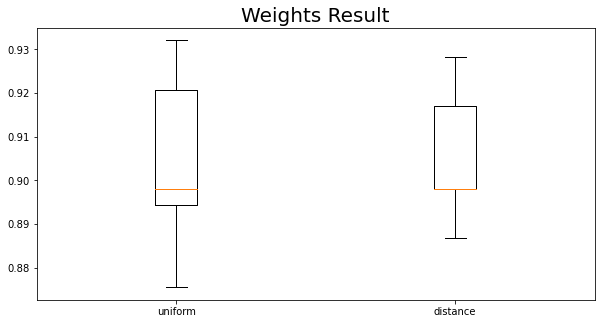

In [66]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.05015254020690918s, Algorithm: auto, Accuracy: [0.89433962 0.8754717  0.92075472 0.93207547 0.89811321], Mean: 0.9041509433962265
Index: 2, Time: 0.11199951171875s, Algorithm: ball_tree, Accuracy: [0.89433962 0.8754717  0.92075472 0.93207547 0.89811321], Mean: 0.9041509433962265
Index: 3, Time: 0.17016243934631348s, Algorithm: kd_tree, Accuracy: [0.89433962 0.8754717  0.92075472 0.93207547 0.89811321], Mean: 0.9041509433962265
Index: 4, Time: 0.2804391384124756s, Algorithm: brute, Accuracy: [0.89433962 0.8754717  0.92075472 0.93207547 0.89811321], Mean: 0.9041509433962265


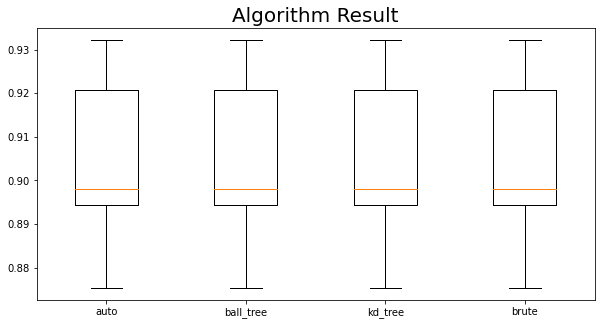

In [67]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

## Method 2: Decision Tree

Index: 1, Time: 0.02651357650756836s, Criterion: gini, Accuracy: [0.85660377 0.84150943 0.84150943 0.89433962 0.84150943], Mean: 0.8550943396226416
Index: 2, Time: 0.06067609786987305s, Criterion: entropy, Accuracy: [0.86792453 0.8490566  0.81886792 0.87169811 0.83018868], Mean: 0.8475471698113208
Index: 3, Time: 0.0711965560913086s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

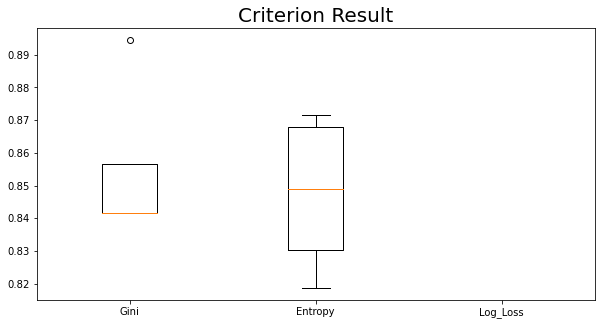

In [68]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = DecisionTreeClassifier(criterion=cri)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.02548074722290039s, Max_Depth: 5, Accuracy: [0.81132075 0.79245283 0.84150943 0.84528302 0.84150943], Mean: 0.8264150943396228
Index: 2, Time: 0.04922914505004883s, Max_Depth: 10, Accuracy: [0.84528302 0.8490566  0.84150943 0.89056604 0.81886792], Mean: 0.8490566037735849
Index: 3, Time: 0.07323765754699707s, Max_Depth: 15, Accuracy: [0.86415094 0.83773585 0.82641509 0.88679245 0.81509434], Mean: 0.8460377358490566
Index: 4, Time: 0.09963679313659668s, Max_Depth: 20, Accuracy: [0.83773585 0.85660377 0.83396226 0.87924528 0.82264151], Mean: 0.8460377358490566
Index: 5, Time: 0.13077044486999512s, Max_Depth: 25, Accuracy: [0.84150943 0.83396226 0.84150943 0.88301887 0.84528302], Mean: 0.8490566037735849


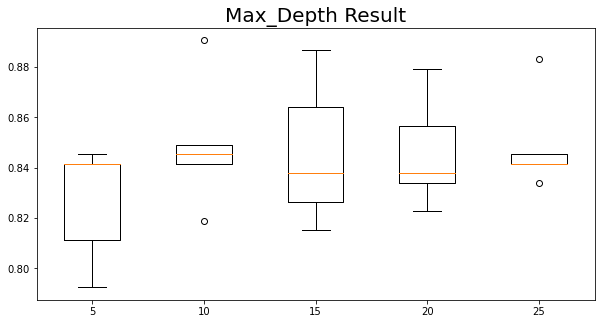

In [69]:
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = DecisionTreeClassifier(max_depth = max_d)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 3: Random Forest

Index: 1, Time: 1.0265603065490723s, Criterion: gini, Accuracy: [0.88679245 0.88301887 0.89056604 0.9245283  0.87924528], Mean: 0.8928301886792454
Index: 2, Time: 2.2447609901428223s, Criterion: entropy, Accuracy: [0.89433962 0.89433962 0.88679245 0.91698113 0.87169811], Mean: 0.8928301886792454
Index: 3, Time: 2.4589364528656006s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\21742\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\21742\anaconda3\lib\site-packages\jobli

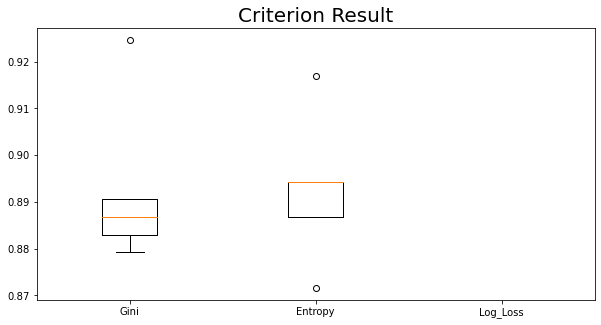

In [70]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = RandomForestClassifier(criterion = cri, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy', 'Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.8815875053405762s, Max_Depth: 5, Accuracy: [0.84528302 0.84150943 0.86037736 0.86037736 0.8490566 ], Mean: 0.8513207547169811
Index: 2, Time: 1.8268465995788574s, Max_Depth: 10, Accuracy: [0.88679245 0.8754717  0.89433962 0.92830189 0.86792453], Mean: 0.8905660377358492
Index: 3, Time: 2.7436938285827637s, Max_Depth: 15, Accuracy: [0.88301887 0.88301887 0.88679245 0.91698113 0.87169811], Mean: 0.8883018867924528
Index: 4, Time: 3.674917697906494s, Max_Depth: 20, Accuracy: [0.88679245 0.88301887 0.89056604 0.9245283  0.87924528], Mean: 0.8928301886792454
Index: 5, Time: 4.6007139682769775s, Max_Depth: 25, Accuracy: [0.88679245 0.88301887 0.89056604 0.9245283  0.87924528], Mean: 0.8928301886792454


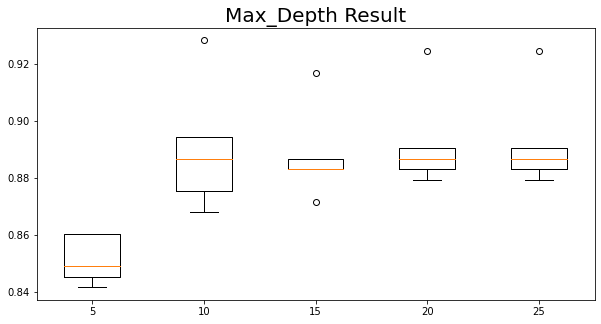

In [71]:
# max_depth_list = [2, 4, 6, 8, 10]
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = RandomForestClassifier(max_depth=max_d, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.0758669376373291s, N_Estimators: 5, Accuracy: [0.86415094 0.88679245 0.8754717  0.89811321 0.86037736], Mean: 0.8769811320754718
Index: 2, Time: 0.20339250564575195s, N_Estimators: 10, Accuracy: [0.86037736 0.88301887 0.89433962 0.92830189 0.86037736], Mean: 0.8852830188679246
Index: 3, Time: 0.3731675148010254s, N_Estimators: 15, Accuracy: [0.8754717  0.89056604 0.89433962 0.91320755 0.85283019], Mean: 0.8852830188679246
Index: 4, Time: 0.5834290981292725s, N_Estimators: 20, Accuracy: [0.86792453 0.87924528 0.89433962 0.91320755 0.85660377], Mean: 0.8822641509433964
Index: 5, Time: 0.8423047065734863s, N_Estimators: 25, Accuracy: [0.87924528 0.88679245 0.88679245 0.91698113 0.86415094], Mean: 0.8867924528301888


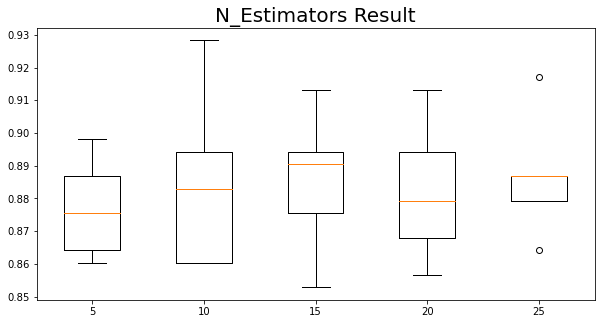

In [72]:
n_estimators_list = [5, 10 ,15 ,20 ,25]
cnt = 0
res = []
start = time.time()

for n_est in n_estimators_list:
    cnt += 1
    clf = RandomForestClassifier(n_estimators = n_est, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Estimators: {n_est}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Estimators Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 4: Support Vector Machine

Index: 1, Time: 0.3765394687652588s, Kernel: linear, Accuracy: [0.8        0.82641509 0.83396226 0.83396226 0.85660377], Mean: 0.8301886792452831
Index: 2, Time: 0.522885799407959s, Kernel: poly, Accuracy: [0.81132075 0.8490566  0.89811321 0.85660377 0.86415094], Mean: 0.8558490566037736
Index: 3, Time: 0.6977322101593018s, Kernel: rbf, Accuracy: [0.90188679 0.88679245 0.9245283  0.92830189 0.88679245], Mean: 0.9056603773584907
Index: 4, Time: 0.843604326248169s, Kernel: sigmoid, Accuracy: [0.68301887 0.76226415 0.71320755 0.7245283  0.74716981], Mean: 0.7260377358490565


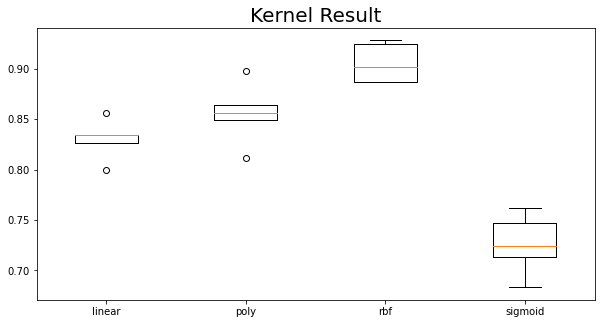

In [73]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
cnt = 0
res = []
start = time.time()

for ker in kernel_list:
    cnt += 1
    clf = SVC(kernel=ker)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Kernel: {ker}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Kernel Result',fontsize=20)
labels = 'linear', 'poly', 'rbf', 'sigmoid'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.2530219554901123s, C: 0.2, Accuracy: [0.86792453 0.8754717  0.89811321 0.88301887 0.87169811], Mean: 0.879245283018868
Index: 2, Time: 0.44567275047302246s, C: 0.4, Accuracy: [0.89811321 0.87924528 0.90943396 0.91320755 0.8754717 ], Mean: 0.8950943396226416
Index: 3, Time: 0.6231131553649902s, C: 0.6, Accuracy: [0.89811321 0.88301887 0.91698113 0.91698113 0.88301887], Mean: 0.8996226415094339
Index: 4, Time: 0.7848784923553467s, C: 0.8, Accuracy: [0.89811321 0.88301887 0.9245283  0.9245283  0.88679245], Mean: 0.9033962264150943
Index: 5, Time: 0.9475076198577881s, C: 1.0, Accuracy: [0.90188679 0.88679245 0.9245283  0.92830189 0.88679245], Mean: 0.9056603773584907
Index: 6, Time: 1.1026837825775146s, C: 1.2, Accuracy: [0.89811321 0.88301887 0.9245283  0.92830189 0.88679245], Mean: 0.9041509433962265
Index: 7, Time: 1.2581114768981934s, C: 1.4, Accuracy: [0.89056604 0.88679245 0.9245283  0.92830189 0.87924528], Mean: 0.9018867924528303


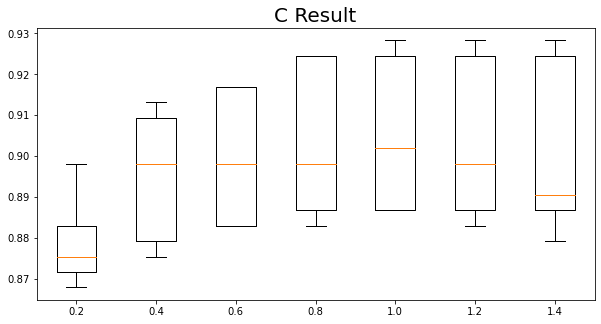

In [74]:
C_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
cnt = 0
res = []
start = time.time()

for c in C_list:
    cnt += 1
    clf = SVC(C = c, kernel = 'rbf')
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, C: {c}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('C Result',fontsize=20)
labels = '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'
plt.boxplot(res, labels = labels)
plt.show()

# Pair 2: M and Y

In [29]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [30]:
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
Pair_2 = np.concatenate((M,Y))
#print(Pair_2.shape)

In [31]:
X_train, X_val, y_train, y_val = train_test_split(Pair_2[:,1:], Pair_2[:,0], test_size=0.1, random_state=0)

## Method 1: KNN

Index: 1, Time: 0.09773445129394531s, N_Neighbors: 1, Accuracy: [1. 1. 1. 1. 1.], Mean: 1.0
Index: 2, Time: 0.20978069305419922s, N_Neighbors: 3, Accuracy: [1.         0.99647887 1.         0.99647887 1.        ], Mean: 0.9985915492957746
Index: 3, Time: 0.32535576820373535s, N_Neighbors: 5, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 4, Time: 0.44216442108154297s, N_Neighbors: 7, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 5, Time: 0.5528223514556885s, N_Neighbors: 9, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662


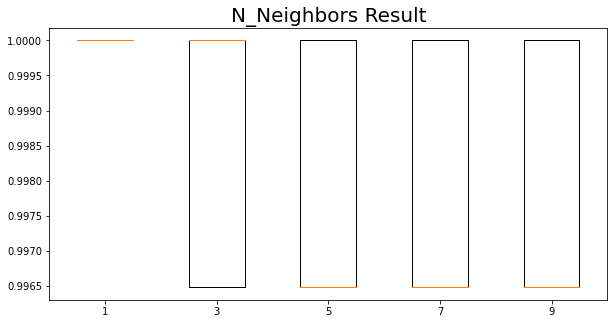

In [32]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.1088569164276123s, Weights: uniform, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 2, Time: 0.17501020431518555s, Weights: distance, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662


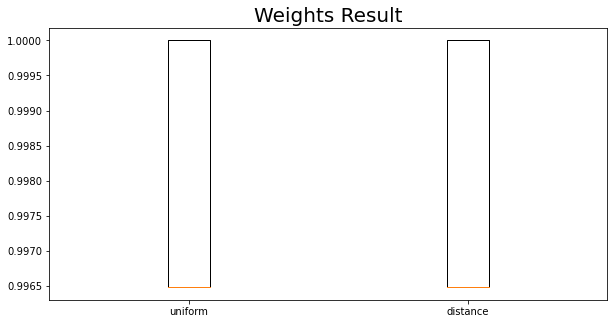

In [33]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.10577869415283203s, Algorithm: auto, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 2, Time: 0.22907233238220215s, Algorithm: ball_tree, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 3, Time: 0.31717371940612793s, Algorithm: kd_tree, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 4, Time: 0.4180622100830078s, Algorithm: brute, Accuracy: [1.         0.99647887 0.99647887 0.99647887 1.        ], Mean: 0.997887323943662


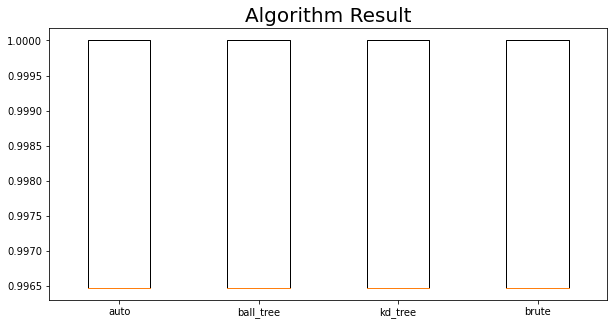

In [34]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

## Method 2: Decision Tree

Index: 1, Time: 0.02558302879333496s, Criterion: gini, Accuracy: [0.98943662 0.97887324 0.97535211 0.98239437 0.98943662], Mean: 0.9830985915492958
Index: 2, Time: 0.04862713813781738s, Criterion: entropy, Accuracy: [0.98943662 0.97887324 0.98943662 0.99647887 0.99647887], Mean: 0.9901408450704225
Index: 3, Time: 0.06618475914001465s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

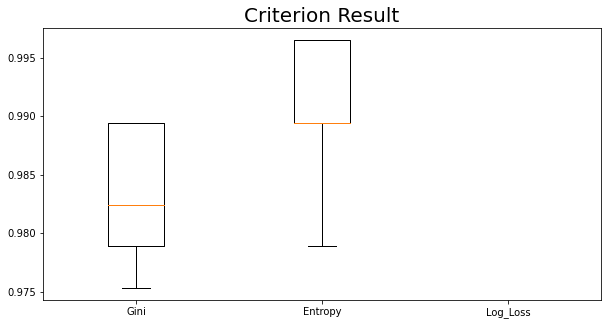

In [35]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = DecisionTreeClassifier(criterion=cri)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.02552318572998047s, Max_Depth: 5, Accuracy: [0.98943662 0.97887324 0.97535211 0.98591549 0.98943662], Mean: 0.9838028169014084
Index: 2, Time: 0.04933953285217285s, Max_Depth: 10, Accuracy: [0.98943662 0.97887324 0.97887324 0.99295775 0.98943662], Mean: 0.9859154929577464
Index: 3, Time: 0.07237505912780762s, Max_Depth: 15, Accuracy: [0.98943662 0.97887324 0.97887324 0.98591549 0.98943662], Mean: 0.984507042253521
Index: 4, Time: 0.10048270225524902s, Max_Depth: 20, Accuracy: [0.98591549 0.97887324 0.97887324 0.98943662 0.99295775], Mean: 0.9852112676056338
Index: 5, Time: 0.12402820587158203s, Max_Depth: 25, Accuracy: [0.98943662 0.97535211 0.97887324 0.97887324 0.99295775], Mean: 0.9830985915492958


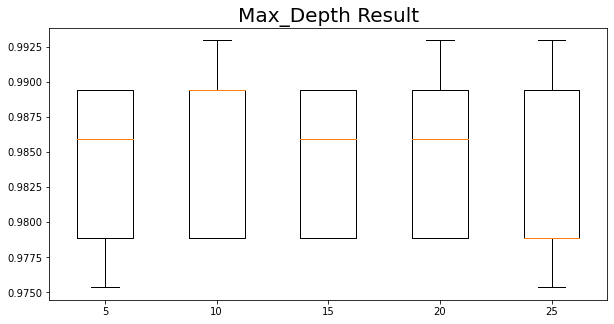

In [36]:
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = DecisionTreeClassifier(max_depth = max_d)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 3: Random Forest

Index: 1, Time: 0.8200390338897705s, Criterion: gini, Accuracy: [0.99295775 0.98591549 0.99295775 0.99647887 1.        ], Mean: 0.993661971830986
Index: 2, Time: 1.6447949409484863s, Criterion: entropy, Accuracy: [0.99295775 0.99295775 0.99295775 0.99647887 1.        ], Mean: 0.9950704225352112
Index: 3, Time: 1.8045339584350586s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\21742\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\21742\anaconda3\lib\site-packages\jobli

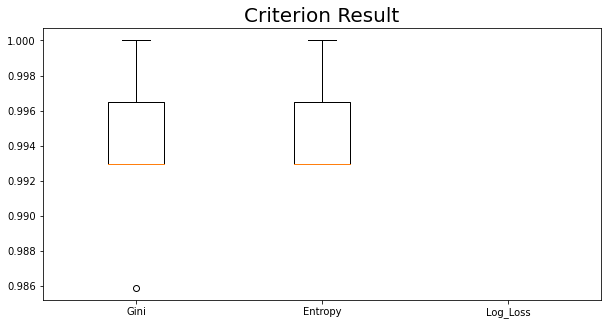

In [37]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = RandomForestClassifier(criterion = cri, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.6675384044647217s, Max_Depth: 2, Accuracy: [0.98239437 0.97535211 0.97183099 0.97535211 0.98239437], Mean: 0.9774647887323944
Index: 2, Time: 1.369936227798462s, Max_Depth: 4, Accuracy: [0.99295775 0.98943662 0.98943662 0.99647887 0.99647887], Mean: 0.9929577464788732
Index: 3, Time: 2.075019121170044s, Max_Depth: 6, Accuracy: [0.99647887 0.99295775 0.99295775 0.99647887 1.        ], Mean: 0.995774647887324
Index: 4, Time: 2.7920756340026855s, Max_Depth: 8, Accuracy: [0.99295775 0.98591549 0.99295775 0.99647887 1.        ], Mean: 0.993661971830986
Index: 5, Time: 3.500323534011841s, Max_Depth: 10, Accuracy: [0.99295775 0.98591549 0.99295775 0.99647887 1.        ], Mean: 0.993661971830986


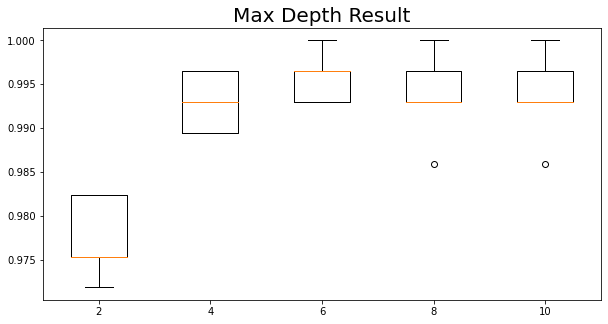

In [38]:
max_depth_list = [2, 4, 6, 8, 10]
# max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = RandomForestClassifier(max_depth=max_d, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max Depth Result',fontsize=20)
labels = '2','4', 6, '8', '10'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.05979466438293457s, N_Estimators: 5, Accuracy: [0.99295775 0.98591549 0.98943662 0.99295775 0.99647887], Mean: 0.991549295774648
Index: 2, Time: 0.15778374671936035s, N_Estimators: 10, Accuracy: [1.         0.98591549 0.99647887 0.99647887 0.99647887], Mean: 0.9950704225352112
Index: 3, Time: 0.2792792320251465s, N_Estimators: 15, Accuracy: [1.         0.98943662 0.99295775 0.99647887 1.        ], Mean: 0.995774647887324
Index: 4, Time: 0.442626953125s, N_Estimators: 20, Accuracy: [1.         0.98943662 0.99295775 0.99647887 1.        ], Mean: 0.995774647887324
Index: 5, Time: 0.6407496929168701s, N_Estimators: 25, Accuracy: [1.         0.98591549 0.98943662 0.99647887 1.        ], Mean: 0.9943661971830986


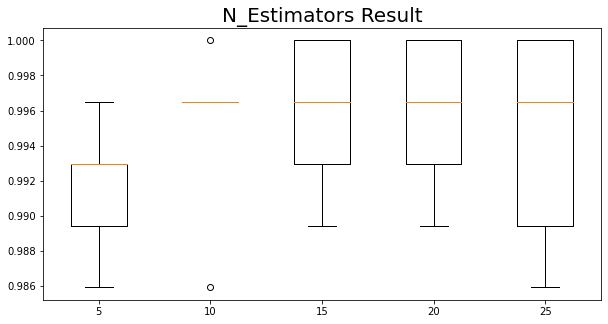

In [39]:
n_estimators_list = [5, 10 ,15 ,20 ,25]
cnt = 0
res = []
start = time.time()

for n_est in n_estimators_list:
    cnt += 1
    clf = RandomForestClassifier(n_estimators = n_est, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Estimators: {n_est}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Estimators Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 4: Support Vector Machine

Index: 1, Time: 0.052066802978515625s, Kernel: linear, Accuracy: [0.99647887 1.         0.99647887 0.99647887 1.        ], Mean: 0.997887323943662
Index: 2, Time: 0.10126042366027832s, Kernel: poly, Accuracy: [1.         1.         0.99647887 1.         1.        ], Mean: 0.9992957746478872
Index: 3, Time: 0.1571638584136963s, Kernel: rbf, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492
Index: 4, Time: 0.694793701171875s, Kernel: sigmoid, Accuracy: [0.66549296 0.65140845 0.6443662  0.65140845 0.65492958], Mean: 0.6535211267605634


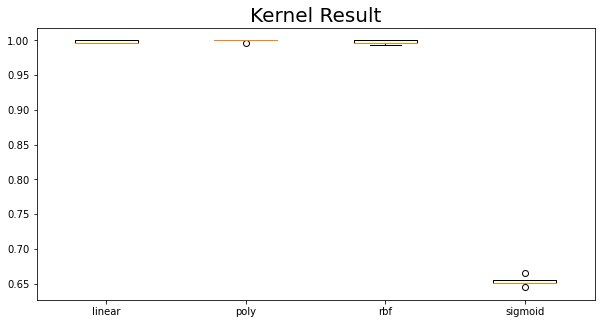

In [40]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
cnt = 0
res = []
start = time.time()

for ker in kernel_list:
    cnt += 1
    clf = SVC(kernel=ker)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Kernel: {ker}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Kernel Result',fontsize=20)
labels = 'linear', 'poly', 'rbf', 'sigmoid'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.0931997299194336s, C: 0.2, Accuracy: [1.         0.99295775 0.99295775 0.99647887 0.99647887], Mean: 0.995774647887324
Index: 2, Time: 0.16787505149841309s, C: 0.4, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492
Index: 3, Time: 0.2281661033630371s, C: 0.6, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492
Index: 4, Time: 0.2833731174468994s, C: 0.8, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492
Index: 5, Time: 0.34211206436157227s, C: 1.0, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492
Index: 6, Time: 0.39303135871887207s, C: 1.2, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492
Index: 7, Time: 0.44352197647094727s, C: 1.4, Accuracy: [1.         0.99647887 0.99295775 0.99647887 1.        ], Mean: 0.9971830985915492


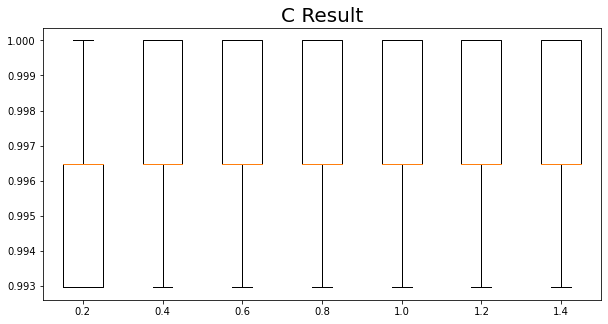

In [41]:
C_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
cnt = 0
res = []
start = time.time()

for c in C_list:
    cnt += 1
    clf = SVC(C = c, kernel = 'rbf')
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, C: {c}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('C Result',fontsize=20)
labels = '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'
plt.boxplot(res, labels = labels)
plt.show()

# Feature extraction (PCA)

In [75]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [76]:
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
Pair_2 = np.concatenate((M,Y))

In [77]:
X_train, X_val, y_train, y_val = train_test_split(Pair_2[:,1:], Pair_2[:,0], test_size=0.1, random_state=0)

In [78]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
# print(pca_result.shape)

## Method 1: KNN

Index: 1, Time: 0.05613565444946289s, N_Neighbors: 1, Accuracy: [0.96830986 0.97535211 0.98591549 0.98943662 0.98239437], Mean: 0.9802816901408452
Index: 2, Time: 0.11540365219116211s, N_Neighbors: 3, Accuracy: [0.96830986 0.97887324 0.98943662 0.98591549 0.98239437], Mean: 0.9809859154929578
Index: 3, Time: 0.17307281494140625s, N_Neighbors: 5, Accuracy: [0.97535211 0.97183099 0.98239437 0.98591549 0.99295775], Mean: 0.9816901408450704
Index: 4, Time: 0.2299184799194336s, N_Neighbors: 7, Accuracy: [0.97183099 0.97183099 0.97535211 0.98591549 0.99295775], Mean: 0.9795774647887324
Index: 5, Time: 0.2881200313568115s, N_Neighbors: 9, Accuracy: [0.96830986 0.96830986 0.97535211 0.98591549 0.98943662], Mean: 0.9774647887323944


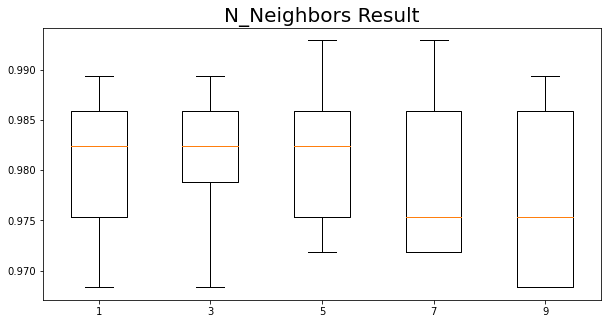

In [79]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.057775259017944336s, Weights: uniform, Accuracy: [0.97535211 0.97183099 0.98239437 0.98591549 0.99295775], Mean: 0.9816901408450704
Index: 2, Time: 0.07883882522583008s, Weights: distance, Accuracy: [0.97535211 0.97183099 0.98591549 0.98591549 0.98943662], Mean: 0.9816901408450704


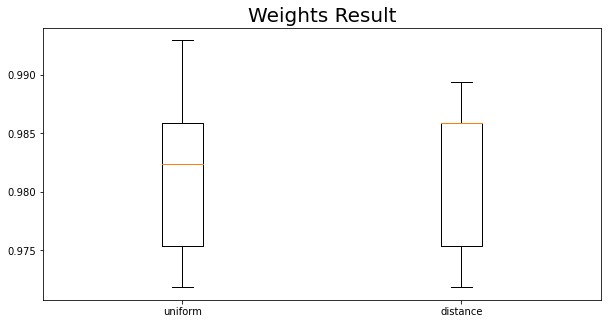

In [80]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.16573119163513184s, Algorithm: auto, Accuracy: [0.97535211 0.97183099 0.98239437 0.98591549 0.99295775], Mean: 0.9816901408450704
Index: 2, Time: 0.22500181198120117s, Algorithm: ball_tree, Accuracy: [0.97535211 0.97183099 0.98239437 0.98591549 0.99295775], Mean: 0.9816901408450704
Index: 3, Time: 0.27559685707092285s, Algorithm: kd_tree, Accuracy: [0.97535211 0.97183099 0.98239437 0.98591549 0.99295775], Mean: 0.9816901408450704
Index: 4, Time: 0.3667747974395752s, Algorithm: brute, Accuracy: [0.97535211 0.97183099 0.98239437 0.98591549 0.99295775], Mean: 0.9816901408450704


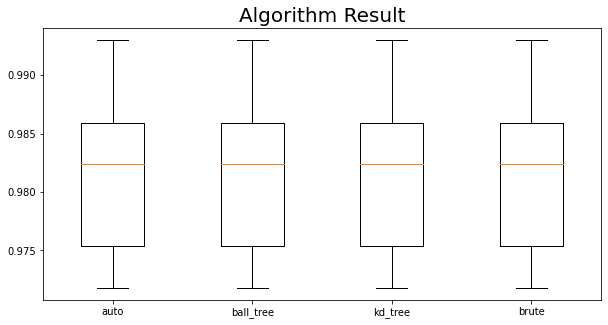

In [81]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

## Method 2: Decision Tree

Index: 1, Time: 0.023069381713867188s, Criterion: gini, Accuracy: [0.9471831  0.96830986 0.96478873 0.96478873 0.96830986], Mean: 0.9626760563380282
Index: 2, Time: 0.05420517921447754s, Criterion: entropy, Accuracy: [0.96126761 0.96126761 0.95774648 0.98239437 0.97535211], Mean: 0.9676056338028168
Index: 3, Time: 0.06736135482788086s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

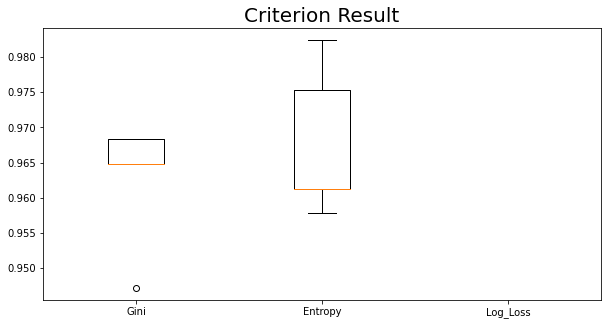

In [82]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = DecisionTreeClassifier(criterion=cri)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.027773380279541016s, Max_Depth: 5, Accuracy: [0.95422535 0.97535211 0.96830986 0.96830986 0.97183099], Mean: 0.9676056338028168
Index: 2, Time: 0.051258087158203125s, Max_Depth: 10, Accuracy: [0.95070423 0.97535211 0.97183099 0.97535211 0.96478873], Mean: 0.967605633802817
Index: 3, Time: 0.07297992706298828s, Max_Depth: 15, Accuracy: [0.95070423 0.97535211 0.97535211 0.97535211 0.96830986], Mean: 0.9690140845070424
Index: 4, Time: 0.09600329399108887s, Max_Depth: 20, Accuracy: [0.95774648 0.97183099 0.95422535 0.96830986 0.96830986], Mean: 0.9640845070422536
Index: 5, Time: 0.12115621566772461s, Max_Depth: 25, Accuracy: [0.94366197 0.97535211 0.96830986 0.97535211 0.96830986], Mean: 0.9661971830985916


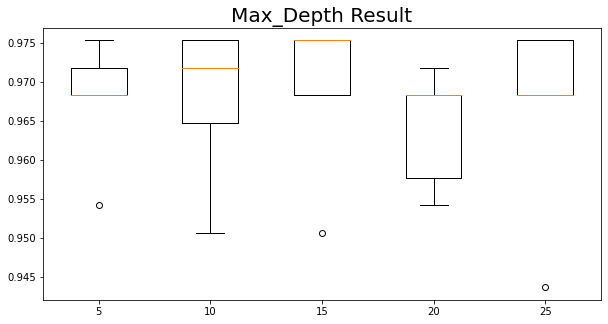

In [83]:
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = DecisionTreeClassifier(max_depth = max_d)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 3: Random Forest

Index: 1, Time: 0.9141340255737305s, Criterion: gini, Accuracy: [0.97535211 0.97183099 0.97183099 0.98591549 0.98239437], Mean: 0.9774647887323944
Index: 2, Time: 1.9530558586120605s, Criterion: entropy, Accuracy: [0.97535211 0.97535211 0.97887324 0.98239437 0.98239437], Mean: 0.9788732394366197
Index: 3, Time: 2.0997142791748047s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\21742\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\21742\anaconda3\lib\site-packages\jobli

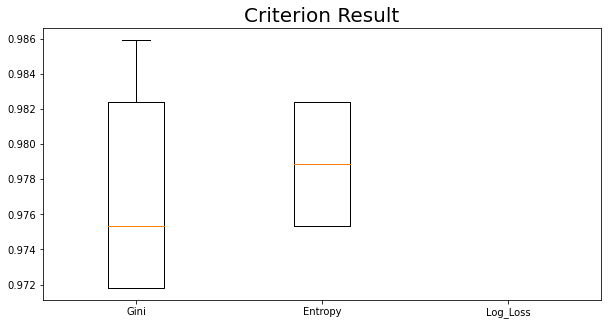

In [84]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = RandomForestClassifier(criterion = cri, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.7606461048126221s, Max_Depth: 2, Accuracy: [0.95774648 0.95774648 0.95070423 0.96478873 0.96126761], Mean: 0.9584507042253522
Index: 2, Time: 1.5534460544586182s, Max_Depth: 4, Accuracy: [0.97535211 0.96478873 0.97183099 0.98239437 0.98943662], Mean: 0.9767605633802816
Index: 3, Time: 2.3676717281341553s, Max_Depth: 6, Accuracy: [0.97183099 0.96830986 0.97535211 0.98591549 0.98591549], Mean: 0.9774647887323944
Index: 4, Time: 3.213041067123413s, Max_Depth: 8, Accuracy: [0.97535211 0.97183099 0.97535211 0.98591549 0.98591549], Mean: 0.9788732394366197
Index: 5, Time: 4.056676149368286s, Max_Depth: 10, Accuracy: [0.97535211 0.97183099 0.97183099 0.98591549 0.98239437], Mean: 0.9774647887323944


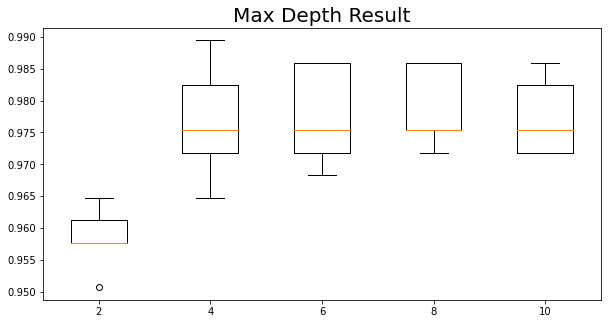

In [85]:
max_depth_list = [2, 4, 6, 8, 10]
# max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = RandomForestClassifier(max_depth=max_d, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max Depth Result',fontsize=20)
labels = '2','4', 6, '8', '10'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.07506084442138672s, N_Estimators: 5, Accuracy: [0.97183099 0.96830986 0.96478873 0.97535211 0.98591549], Mean: 0.9732394366197183
Index: 2, Time: 0.1990511417388916s, N_Estimators: 10, Accuracy: [0.97183099 0.96478873 0.96478873 0.97887324 0.98239437], Mean: 0.9725352112676056
Index: 3, Time: 0.3508036136627197s, N_Estimators: 15, Accuracy: [0.97535211 0.96126761 0.96478873 0.98591549 0.97535211], Mean: 0.9725352112676056
Index: 4, Time: 0.5391974449157715s, N_Estimators: 20, Accuracy: [0.96830986 0.96126761 0.96478873 0.98591549 0.98591549], Mean: 0.9732394366197183
Index: 5, Time: 0.7787292003631592s, N_Estimators: 25, Accuracy: [0.97887324 0.96126761 0.96830986 0.98591549 0.98591549], Mean: 0.976056338028169


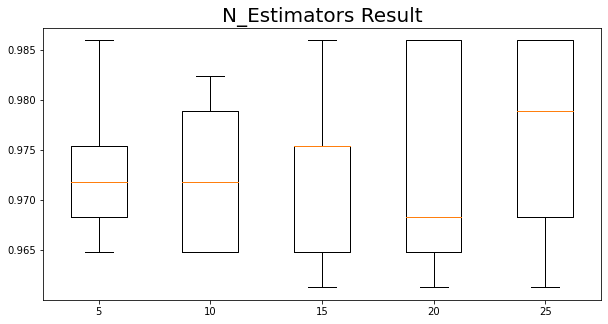

In [86]:
n_estimators_list = [5, 10 ,15 ,20 ,25]
cnt = 0
res = []
start = time.time()

for n_est in n_estimators_list:
    cnt += 1
    clf = RandomForestClassifier(n_estimators = n_est, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Estimators: {n_est}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Estimators Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 4: Support Vector Machine

Index: 1, Time: 0.0616304874420166s, Kernel: linear, Accuracy: [0.97887324 0.97887324 0.97535211 0.97887324 0.98239437], Mean: 0.9788732394366197
Index: 2, Time: 0.11874222755432129s, Kernel: poly, Accuracy: [0.98239437 0.98239437 0.96830986 0.97887324 0.97887324], Mean: 0.9781690140845072
Index: 3, Time: 0.17553472518920898s, Kernel: rbf, Accuracy: [0.97183099 0.97535211 0.97887324 0.98943662 0.98591549], Mean: 0.9802816901408452
Index: 4, Time: 0.24768567085266113s, Kernel: sigmoid, Accuracy: [0.91549296 0.91901408 0.93309859 0.92605634 0.95422535], Mean: 0.9295774647887324


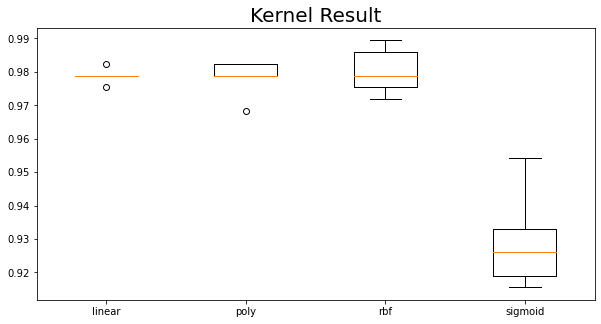

In [87]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
cnt = 0
res = []
start = time.time()

for ker in kernel_list:
    cnt += 1
    clf = SVC(kernel=ker)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Kernel: {ker}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Kernel Result',fontsize=20)
labels = 'linear', 'poly', 'rbf', 'sigmoid'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.09727191925048828s, C: 0.2, Accuracy: [0.97183099 0.97887324 0.97535211 0.98591549 0.98591549], Mean: 0.9795774647887324
Index: 2, Time: 0.1651012897491455s, C: 0.4, Accuracy: [0.97183099 0.97887324 0.97887324 0.98943662 0.98591549], Mean: 0.9809859154929578
Index: 3, Time: 0.2252979278564453s, C: 0.6, Accuracy: [0.97183099 0.97887324 0.97887324 0.98943662 0.98591549], Mean: 0.9809859154929578
Index: 4, Time: 0.2786240577697754s, C: 0.8, Accuracy: [0.97183099 0.97887324 0.97887324 0.98943662 0.98591549], Mean: 0.9809859154929578
Index: 5, Time: 0.33547282218933105s, C: 1.0, Accuracy: [0.97183099 0.97535211 0.97887324 0.98943662 0.98591549], Mean: 0.9802816901408452
Index: 6, Time: 0.38820958137512207s, C: 1.2, Accuracy: [0.97183099 0.97535211 0.97887324 0.98943662 0.98591549], Mean: 0.9802816901408452
Index: 7, Time: 0.438983678817749s, C: 1.4, Accuracy: [0.97183099 0.97535211 0.97535211 0.98943662 0.98591549], Mean: 0.9795774647887324


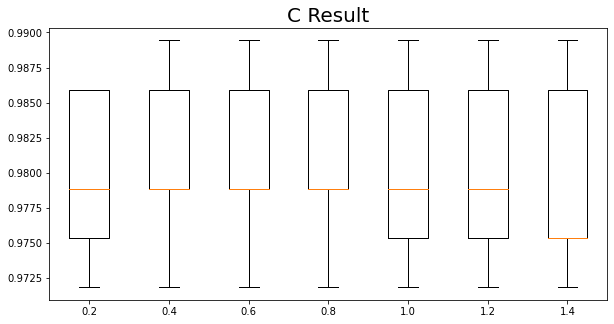

In [88]:
C_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
cnt = 0
res = []
start = time.time()

for c in C_list:
    cnt += 1
    clf = SVC(C = c, kernel = 'rbf')
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, C: {c}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('C Result',fontsize=20)
labels = '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'
plt.boxplot(res, labels = labels)
plt.show()

# Pair 3: F and X

In [9]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [10]:
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Pair_3 = np.concatenate((F,X))
# print(Pair_3.shape)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(Pair_3[:,1:], Pair_3[:,0], test_size=0.1, random_state=0)

## Method 1: KNN

Index: 1, Time: 0.09937143325805664s, N_Neighbors: 1, Accuracy: [1.         1.         1.         0.99288256 1.        ], Mean: 0.9985765124555159
Index: 2, Time: 0.2077643871307373s, N_Neighbors: 3, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ], Mean: 0.9985765124555159
Index: 3, Time: 0.3180413246154785s, N_Neighbors: 5, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ], Mean: 0.9985765124555159
Index: 4, Time: 0.43212032318115234s, N_Neighbors: 7, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ], Mean: 0.9985765124555159
Index: 5, Time: 0.5340898036956787s, N_Neighbors: 9, Accuracy: [0.99644128 1.         1.         0.99644128 1.        ], Mean: 0.9985765124555159


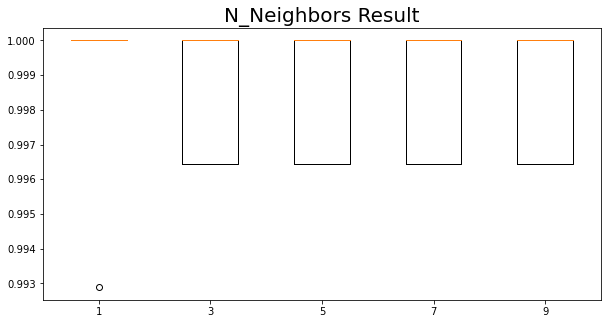

In [60]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.10164141654968262s, Weights: uniform, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ], Mean: 0.9985765124555159
Index: 2, Time: 0.16179847717285156s, Weights: distance, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ], Mean: 0.9985765124555159


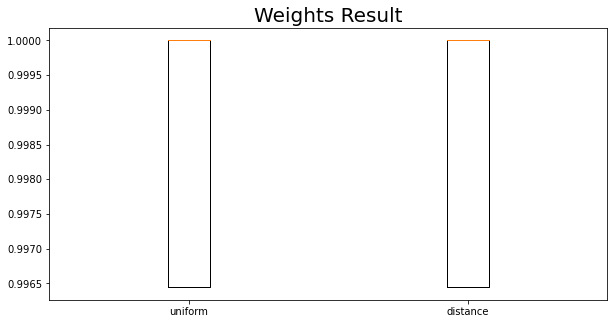

In [61]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.0970005989074707s, Algorithm: auto, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ]
Index: 2, Time: 0.20600152015686035s, Algorithm: ball_tree, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ]
Index: 3, Time: 0.30499815940856934s, Algorithm: kd_tree, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ]
Index: 4, Time: 0.39499878883361816s, Algorithm: brute, Accuracy: [1.         1.         0.99644128 0.99644128 1.        ]


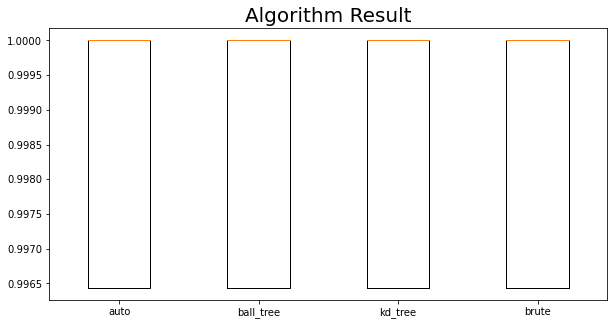

In [55]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

## Method 2: Decision Tree

Index: 1, Time: 0.028879880905151367s, Criterion: gini, Accuracy: [0.98932384 0.97508897 0.99644128 0.97864769 0.98220641], Mean: 0.9843416370106761
Index: 2, Time: 0.05630207061767578s, Criterion: entropy, Accuracy: [0.99288256 0.98576512 0.98576512 0.98220641 0.98576512], Mean: 0.9864768683274022
Index: 3, Time: 0.06987547874450684s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

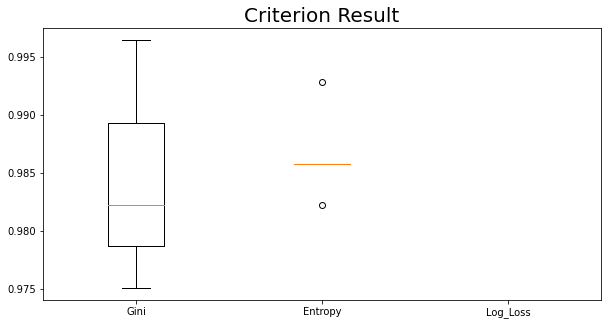

In [62]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = DecisionTreeClassifier(criterion=cri)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.024169206619262695s, Max_Depth: 5, Accuracy: [0.97153025 0.96441281 0.99288256 0.97864769 0.98220641], Mean: 0.977935943060498
Index: 2, Time: 0.049053192138671875s, Max_Depth: 10, Accuracy: [0.98576512 0.98220641 0.99644128 0.98576512 0.98220641], Mean: 0.9864768683274022
Index: 3, Time: 0.07777976989746094s, Max_Depth: 15, Accuracy: [0.97864769 0.98220641 0.99644128 0.98220641 0.97864769], Mean: 0.9836298932384342
Index: 4, Time: 0.1026763916015625s, Max_Depth: 20, Accuracy: [0.97864769 0.97153025 0.99644128 0.98220641 0.98576512], Mean: 0.982918149466192
Index: 5, Time: 0.12829923629760742s, Max_Depth: 25, Accuracy: [0.98576512 0.97864769 0.99288256 0.97864769 0.98576512], Mean: 0.9843416370106761


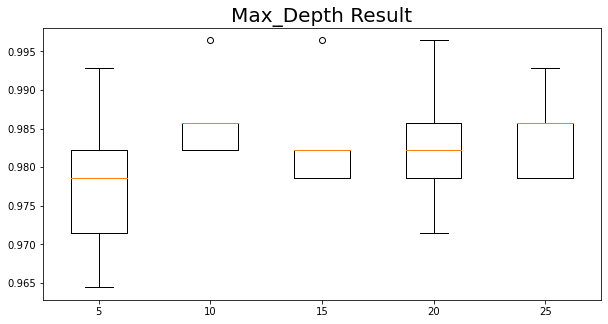

In [63]:
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = DecisionTreeClassifier(max_depth = max_d)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 3: Random Forest

Index: 1, Time: 0.7953755855560303s, Criterion: gini, Accuracy: [0.99644128 0.99644128 0.99644128 0.98220641 0.99288256], Mean: 0.9928825622775801
Index: 2, Time: 1.5524389743804932s, Criterion: entropy, Accuracy: [0.98932384 0.99644128 0.99644128 0.97864769 0.99288256], Mean: 0.9907473309608541
Index: 3, Time: 1.7050836086273193s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\21742\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\21742\anaconda3\lib\site-packages\jobli

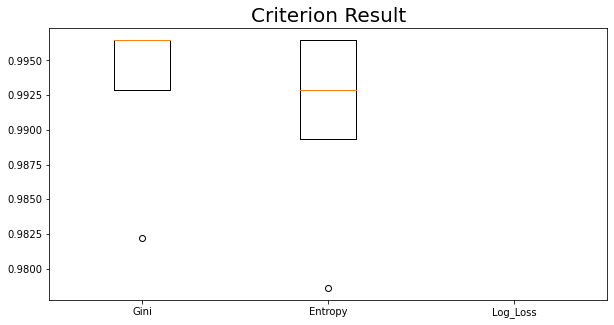

In [64]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = RandomForestClassifier(criterion = cri, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.7518355846405029s, Max_Depth: 2, Accuracy: [0.95017794 0.91814947 0.95729537 0.96441281 0.95729537], Mean: 0.9494661921708184
Index: 2, Time: 1.472642183303833s, Max_Depth: 4, Accuracy: [0.97508897 0.97508897 0.98932384 0.97508897 0.97508897], Mean: 0.9779359430604982
Index: 3, Time: 2.219470262527466s, Max_Depth: 6, Accuracy: [0.99288256 0.99644128 0.99644128 0.97508897 0.99288256], Mean: 0.9907473309608541
Index: 4, Time: 2.975947380065918s, Max_Depth: 8, Accuracy: [0.98932384 0.99644128 0.99644128 0.97508897 0.98932384], Mean: 0.98932384341637
Index: 5, Time: 3.7419044971466064s, Max_Depth: 10, Accuracy: [0.99288256 0.99644128 0.99644128 0.98220641 0.99288256], Mean: 0.9921708185053382


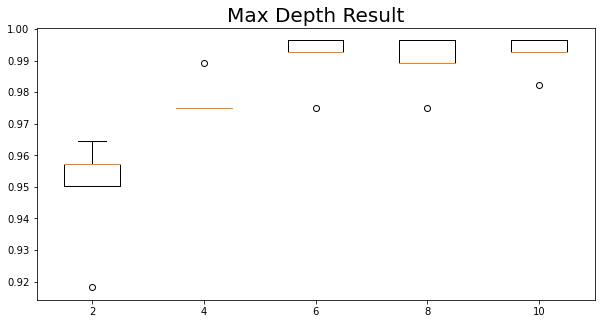

In [65]:
max_depth_list = [2, 4, 6, 8, 10]
# max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = RandomForestClassifier(max_depth=max_d, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max Depth Result',fontsize=20)
labels = '2','4', 6, '8', '10'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.07100343704223633s, N_Estimators: 5, Accuracy: [0.97508897 0.99644128 0.98932384 0.97864769 0.99288256], Mean: 0.9864768683274022
Index: 2, Time: 0.1750025749206543s, N_Estimators: 10, Accuracy: [0.98932384 0.99644128 0.99644128 0.97864769 0.99644128], Mean: 0.991459074733096
Index: 3, Time: 0.30400609970092773s, N_Estimators: 15, Accuracy: [0.98932384 1.         0.99644128 0.97508897 0.99288256], Mean: 0.9907473309608541
Index: 4, Time: 0.4733877182006836s, N_Estimators: 20, Accuracy: [0.98576512 1.         0.99644128 0.97864769 0.99288256], Mean: 0.9907473309608541
Index: 5, Time: 0.6843883991241455s, N_Estimators: 25, Accuracy: [0.98576512 0.99644128 0.99644128 0.97508897 0.99288256], Mean: 0.98932384341637


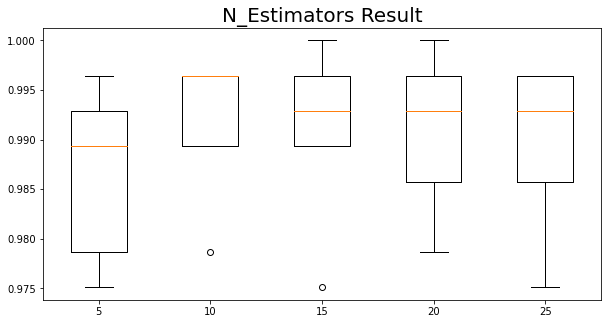

In [13]:
n_estimators_list = [5, 10 ,15 ,20 ,25]
cnt = 0
res = []
start = time.time()

for n_est in n_estimators_list:
    cnt += 1
    clf = RandomForestClassifier(n_estimators = n_est, random_state=0)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Estimators: {n_est}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Estimators Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 4: Support Vector Machine

Index: 1, Time: 0.08853578567504883s, Kernel: linear, Accuracy: [0.97508897 0.97864769 0.96441281 0.98576512 0.98932384], Mean: 0.9786476868327402
Index: 2, Time: 0.16532063484191895s, Kernel: poly, Accuracy: [0.99644128 1.         0.98576512 0.99644128 1.        ], Mean: 0.9957295373665481
Index: 3, Time: 0.25348544120788574s, Kernel: rbf, Accuracy: [0.99644128 1.         0.98932384 0.98932384 0.99644128], Mean: 0.994306049822064
Index: 4, Time: 0.7685971260070801s, Kernel: sigmoid, Accuracy: [0.5088968  0.5088968  0.50177936 0.50177936 0.50177936], Mean: 0.504626334519573


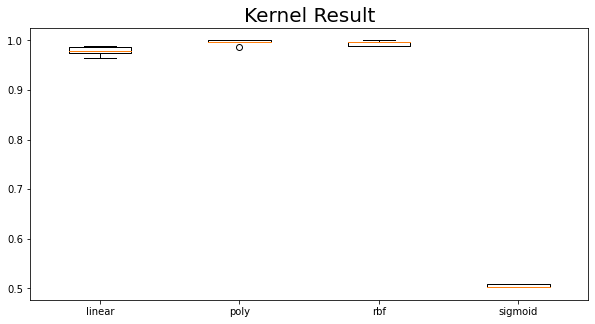

In [66]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
cnt = 0
res = []
start = time.time()

for ker in kernel_list:
    cnt += 1
    clf = SVC(kernel=ker)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Kernel: {ker}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Kernel Result',fontsize=20)
labels = 'linear', 'poly', 'rbf', 'sigmoid'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.1609635353088379s, C: 0.2, Accuracy: [0.98932384 0.97864769 0.97864769 0.98576512 0.99288256], Mean: 0.9850533807829182
Index: 2, Time: 0.27523040771484375s, C: 0.4, Accuracy: [0.99644128 0.98932384 0.98932384 0.98932384 0.99288256], Mean: 0.9914590747330962
Index: 3, Time: 0.3773059844970703s, C: 0.6, Accuracy: [0.99644128 1.         0.98576512 0.98932384 0.99644128], Mean: 0.9935943060498221
Index: 4, Time: 0.4734458923339844s, C: 0.8, Accuracy: [0.99644128 0.99644128 0.98932384 0.98932384 0.99644128], Mean: 0.9935943060498221
Index: 5, Time: 0.5606968402862549s, C: 1.0, Accuracy: [0.99644128 1.         0.98932384 0.98932384 0.99644128], Mean: 0.994306049822064
Index: 6, Time: 0.6400890350341797s, C: 1.2, Accuracy: [0.99644128 1.         0.98932384 0.98932384 0.99644128], Mean: 0.994306049822064
Index: 7, Time: 0.7151939868927002s, C: 1.4, Accuracy: [0.99644128 1.         0.98932384 0.98932384 1.        ], Mean: 0.995017793594306


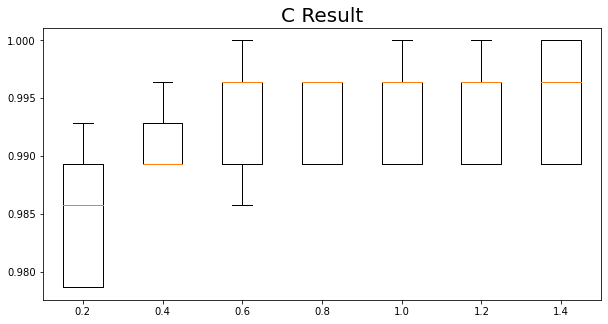

In [67]:
C_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
cnt = 0
res = []
start = time.time()

for c in C_list:
    cnt += 1
    clf = SVC(C = c, kernel = 'rbf')
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, C: {c}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('C Result',fontsize=20)
labels = '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'
plt.boxplot(res, labels = labels)
plt.show()

# Feature extraction (PCA)

In [89]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [90]:
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Pair_3 = np.concatenate((F,X))
# print(Pair_3.shape)

In [91]:
X_train, X_val, y_train, y_val = train_test_split(Pair_3[:,1:], Pair_3[:,0], test_size=0.1, random_state=0)

In [92]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
# print(pca_result.shape

## Method 1: KNN

Index: 1, Time: 0.062308549880981445s, N_Neighbors: 1, Accuracy: [0.97864769 0.98220641 0.97864769 0.98576512 0.98576512], Mean: 0.9822064056939501
Index: 2, Time: 0.1250917911529541s, N_Neighbors: 3, Accuracy: [0.97508897 0.97508897 0.98220641 0.98576512 0.99288256], Mean: 0.9822064056939501
Index: 3, Time: 0.17626738548278809s, N_Neighbors: 5, Accuracy: [0.96797153 0.98576512 0.97508897 0.98220641 0.98932384], Mean: 0.9800711743772241
Index: 4, Time: 0.2273709774017334s, N_Neighbors: 7, Accuracy: [0.97508897 0.98220641 0.97153025 0.98576512 0.98932384], Mean: 0.980782918149466
Index: 5, Time: 0.2799654006958008s, N_Neighbors: 9, Accuracy: [0.96441281 0.97508897 0.97508897 0.99288256 0.98576512], Mean: 0.9786476868327402


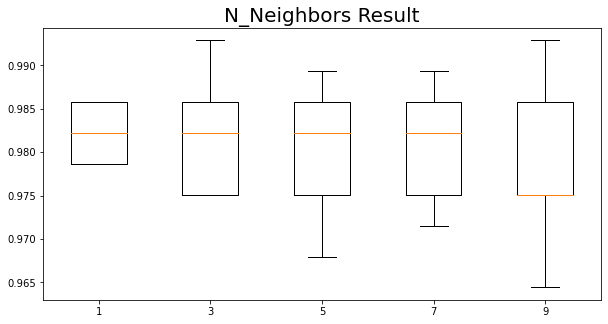

In [93]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.05304741859436035s, Weights: uniform, Accuracy: [0.96797153 0.98576512 0.97508897 0.98220641 0.98932384], Mean: 0.9800711743772241
Index: 2, Time: 0.0735936164855957s, Weights: distance, Accuracy: [0.97153025 0.98576512 0.97508897 0.98576512 0.99288256], Mean: 0.9822064056939503


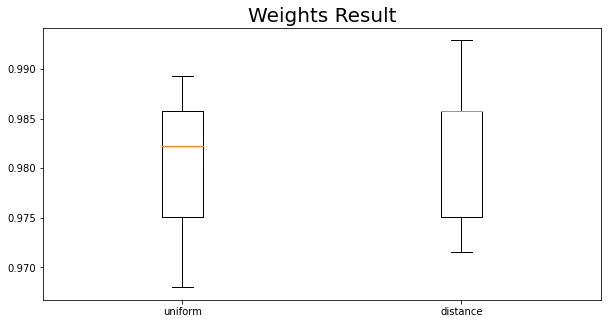

In [94]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.05719923973083496s, Algorithm: auto, Accuracy: [0.96797153 0.98576512 0.97508897 0.98220641 0.98932384], Mean: 0.9800711743772241
Index: 2, Time: 0.12118768692016602s, Algorithm: ball_tree, Accuracy: [0.96797153 0.98576512 0.97508897 0.98220641 0.98932384], Mean: 0.9800711743772241
Index: 3, Time: 0.17887449264526367s, Algorithm: kd_tree, Accuracy: [0.96797153 0.98576512 0.97508897 0.98220641 0.98932384], Mean: 0.9800711743772241
Index: 4, Time: 0.27294206619262695s, Algorithm: brute, Accuracy: [0.96797153 0.98576512 0.97508897 0.98220641 0.98932384], Mean: 0.9800711743772241


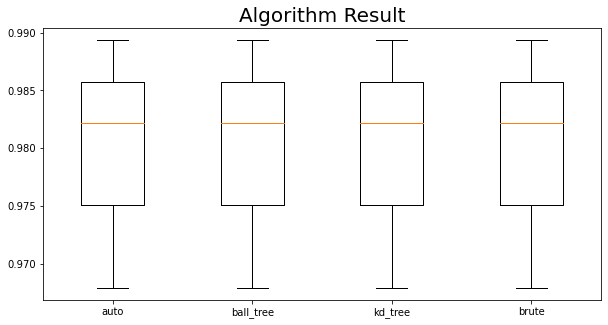

In [95]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

## Method 2: Decision Tree

Index: 1, Time: 0.03376507759094238s, Criterion: gini, Accuracy: [0.93238434 0.9430605  0.96085409 0.94661922 0.97864769], Mean: 0.9523131672597864
Index: 2, Time: 0.06331419944763184s, Criterion: entropy, Accuracy: [0.95017794 0.96085409 0.96085409 0.97153025 0.96797153], Mean: 0.9622775800711743
Index: 3, Time: 0.07383537292480469s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

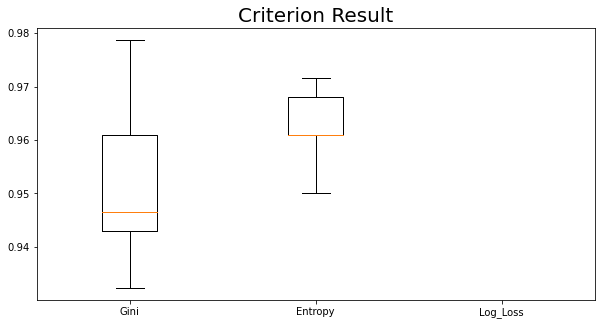

In [96]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = DecisionTreeClassifier(criterion=cri)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.02817988395690918s, Max_Depth: 5, Accuracy: [0.92170819 0.92882562 0.9430605  0.93238434 0.9430605 ], Mean: 0.9338078291814946
Index: 2, Time: 0.052669525146484375s, Max_Depth: 10, Accuracy: [0.92882562 0.9430605  0.96085409 0.95373665 0.97153025], Mean: 0.9516014234875445
Index: 3, Time: 0.07979822158813477s, Max_Depth: 15, Accuracy: [0.91814947 0.93950178 0.96441281 0.95729537 0.97508897], Mean: 0.9508896797153025
Index: 4, Time: 0.20316791534423828s, Max_Depth: 20, Accuracy: [0.93238434 0.93950178 0.96441281 0.95729537 0.97153025], Mean: 0.9530249110320284
Index: 5, Time: 0.2317943572998047s, Max_Depth: 25, Accuracy: [0.93594306 0.93594306 0.96085409 0.95729537 0.97153025], Mean: 0.9523131672597864


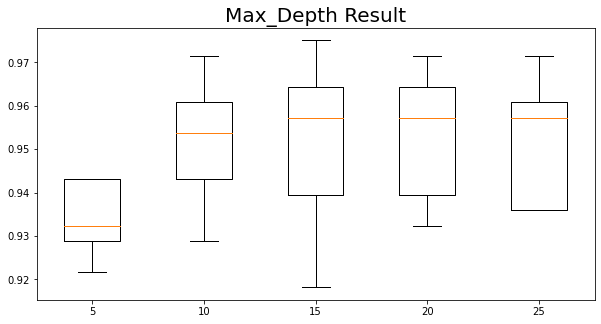

In [97]:
max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = DecisionTreeClassifier(max_depth = max_d)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max_Depth Result',fontsize=20)
labels = '5','10', '15', '20', '25'
plt.boxplot(res, labels = labels)
plt.show()

## Method 3: Random Forest

Index: 1, Time: 0.9474353790283203s, Criterion: gini, Accuracy: [0.96441281 0.97508897 0.97864769 0.97508897 0.99288256], Mean: 0.9772241992882561
Index: 2, Time: 2.01058030128479s, Criterion: entropy, Accuracy: [0.95729537 0.97153025 0.97864769 0.97864769 0.98576512], Mean: 0.9743772241992883
Index: 3, Time: 2.1689655780792236s, Criterion: log_loss, Accuracy: [nan nan nan nan nan], Mean: nan


C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21742\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\21742\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\21742\anaconda3\lib\site-packages\jobli

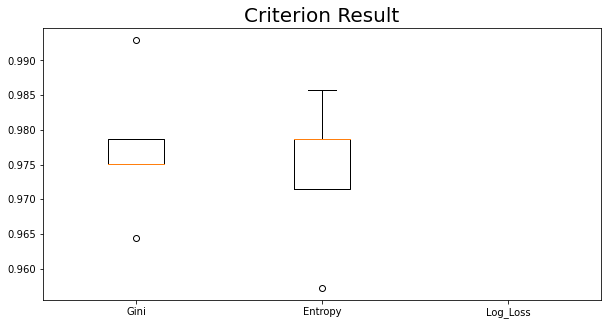

In [98]:
# criterion_list = ['gini', 'entropy']
criterion_list = ['gini', 'entropy', 'log_loss']
cnt = 0
res = []
start = time.time()

for cri in criterion_list:
    cnt += 1
    clf = RandomForestClassifier(criterion = cri, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Criterion: {cri}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Criterion Result',fontsize=20)
labels = 'Gini','Entropy','Log_Loss'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.7464454174041748s, Max_Depth: 2, Accuracy: [0.87900356 0.84697509 0.90747331 0.9430605  0.94661922], Mean: 0.904626334519573
Index: 2, Time: 1.5334110260009766s, Max_Depth: 4, Accuracy: [0.93594306 0.94661922 0.97508897 0.97864769 0.98576512], Mean: 0.9644128113879002
Index: 3, Time: 2.4559407234191895s, Max_Depth: 6, Accuracy: [0.95373665 0.97153025 0.97508897 0.97508897 0.98576512], Mean: 0.9722419928825623
Index: 4, Time: 3.3361589908599854s, Max_Depth: 8, Accuracy: [0.96085409 0.97508897 0.97508897 0.97508897 0.99288256], Mean: 0.9758007117437721
Index: 5, Time: 4.2155921459198s, Max_Depth: 10, Accuracy: [0.96441281 0.97508897 0.98220641 0.97508897 0.98576512], Mean: 0.9765124555160142


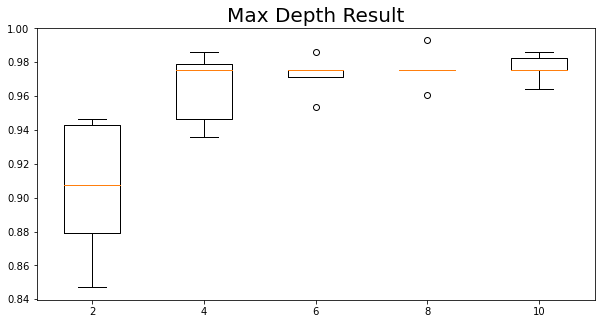

In [99]:
max_depth_list = [2, 4, 6, 8, 10]
# max_depth_list = [5, 10, 15, 20, 25]
# max_depth_list = [10, 20, 30, 40, 50]
cnt = 0
res = []
start = time.time()

for max_d in max_depth_list:
    cnt += 1
    clf = RandomForestClassifier(max_depth=max_d, random_state=0)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Max_Depth: {max_d}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Max Depth Result',fontsize=20)
labels = '2','4', 6, '8', '10'
plt.boxplot(res, labels = labels)
plt.show()

## Method 4: Support Vector Machine

Index: 1, Time: 0.09360671043395996s, Kernel: linear, Accuracy: [0.93594306 0.95373665 0.96085409 0.96441281 0.98932384], Mean: 0.9608540925266904
Index: 2, Time: 0.1968522071838379s, Kernel: poly, Accuracy: [0.94661922 0.91814947 0.94661922 0.96441281 0.96441281], Mean: 0.9480427046263346
Index: 3, Time: 0.29010558128356934s, Kernel: rbf, Accuracy: [0.95373665 0.97508897 0.97864769 0.97153025 0.98932384], Mean: 0.9736654804270464
Index: 4, Time: 0.40346312522888184s, Kernel: sigmoid, Accuracy: [0.84697509 0.79715302 0.81494662 0.83629893 0.92170819], Mean: 0.8434163701067614


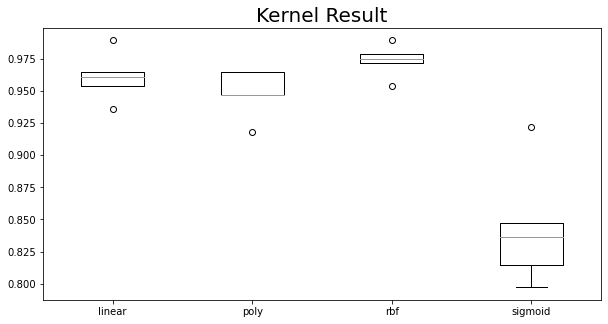

In [100]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
cnt = 0
res = []
start = time.time()

for ker in kernel_list:
    cnt += 1
    clf = SVC(kernel=ker)
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Kernel: {ker}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Kernel Result',fontsize=20)
labels = 'linear', 'poly', 'rbf', 'sigmoid'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.17386651039123535s, C: 0.2, Accuracy: [0.95729537 0.93950178 0.97153025 0.97153025 0.98932384], Mean: 0.9658362989323843
Index: 2, Time: 0.28760194778442383s, C: 0.4, Accuracy: [0.95729537 0.95017794 0.97508897 0.97508897 0.98576512], Mean: 0.9686832740213521
Index: 3, Time: 0.38936567306518555s, C: 0.6, Accuracy: [0.95373665 0.96441281 0.97508897 0.97508897 0.98932384], Mean: 0.9715302491103202
Index: 4, Time: 0.4850788116455078s, C: 0.8, Accuracy: [0.95373665 0.97153025 0.97508897 0.97153025 0.98576512], Mean: 0.9715302491103202
Index: 5, Time: 0.5760266780853271s, C: 1.0, Accuracy: [0.95373665 0.97508897 0.97864769 0.97153025 0.98932384], Mean: 0.9736654804270464
Index: 6, Time: 0.6612796783447266s, C: 1.2, Accuracy: [0.9430605  0.97508897 0.97864769 0.97508897 0.98576512], Mean: 0.9715302491103202
Index: 7, Time: 0.7421448230743408s, C: 1.4, Accuracy: [0.9430605  0.97153025 0.97864769 0.97153025 0.99288256], Mean: 0.9715302491103202


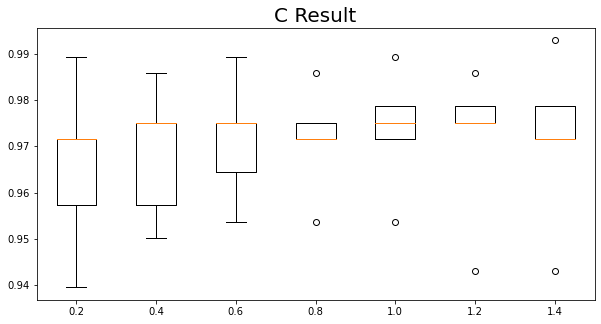

In [101]:
C_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
cnt = 0
res = []
start = time.time()

for c in C_list:
    cnt += 1
    clf = SVC(C = c, kernel = 'rbf')
    accuracy = cross_val_score(clf, X_train_pca, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, C: {c}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('C Result',fontsize=20)
labels = '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'
plt.boxplot(res, labels = labels)
plt.show()

# Multi-class classification

In [102]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [103]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Multi_class = np.concatenate((H,K,M,Y,F,X))

In [104]:
X_train, X_val, y_train, y_val = train_test_split(Multi_class[:,1:], Multi_class[:,0], test_size=0.1, random_state=0)
# print(X_train.shape)
# print(X_val.shape)
# print(y_train.shape)
# print(y_val.shape)

## Method: KNN

Index: 1, Time: 0.40854883193969727s, N_Neighbors: 1, Accuracy: [0.98194946 0.97710843 0.97590361 0.96987952 0.97590361], Mean: 0.9761489278413291
Index: 2, Time: 0.7985398769378662s, N_Neighbors: 3, Accuracy: [0.98315283 0.97590361 0.97228916 0.96746988 0.97108434], Mean: 0.9739799631739956
Index: 3, Time: 1.285801887512207s, N_Neighbors: 5, Accuracy: [0.97713598 0.97831325 0.96746988 0.96506024 0.9746988 ], Mean: 0.9725356298841575
Index: 4, Time: 1.779890775680542s, N_Neighbors: 7, Accuracy: [0.97472924 0.97831325 0.96506024 0.9626506  0.97349398], Mean: 0.9708494628332826
Index: 5, Time: 2.256436824798584s, N_Neighbors: 9, Accuracy: [0.9723225  0.97951807 0.95783133 0.9626506  0.9686747 ], Mean: 0.9681994403607209


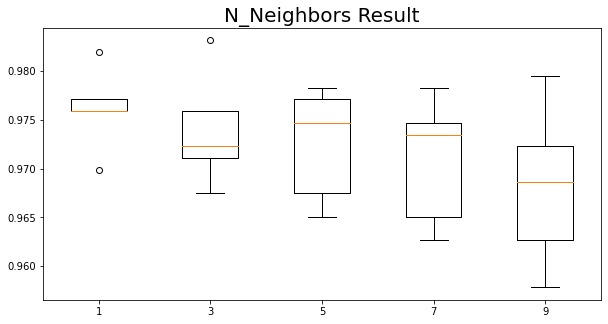

In [85]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.5059695243835449s, Weights: uniform, Accuracy: [0.97713598 0.97831325 0.96746988 0.96506024 0.9746988 ], Mean: 0.9725356298841575
Index: 2, Time: 0.8586010932922363s, Weights: distance, Accuracy: [0.98555957 0.97831325 0.97108434 0.96746988 0.97590361], Mean: 0.9756661302248706


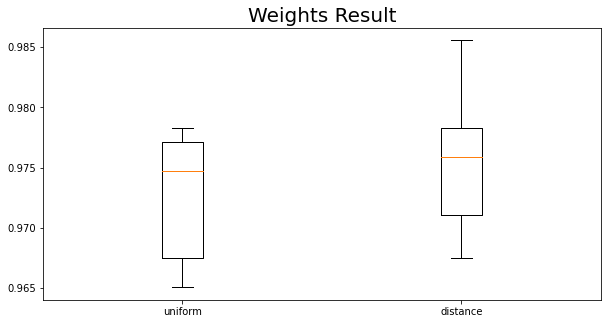

In [86]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.515568733215332s, Algorithm: auto, Accuracy: [0.97713598 0.97831325 0.96746988 0.96506024 0.9746988 ], Mean: 0.9725356298841575
Index: 2, Time: 0.9881424903869629s, Algorithm: ball_tree, Accuracy: [0.97352587 0.97951807 0.96385542 0.96746988 0.9746988 ], Mean: 0.9718136082235078
Index: 3, Time: 1.3112316131591797s, Algorithm: kd_tree, Accuracy: [0.97713598 0.97951807 0.96385542 0.96506024 0.9746988 ], Mean: 0.9720537021733142
Index: 4, Time: 1.785325050354004s, Algorithm: brute, Accuracy: [0.97713598 0.97831325 0.96746988 0.96506024 0.9746988 ], Mean: 0.9725356298841575


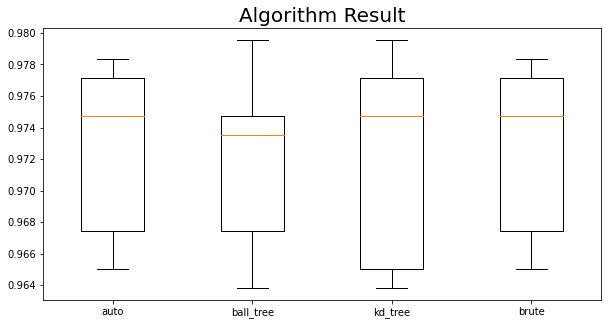

In [87]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

# Simple Quality filtering (Low Variance)

In [105]:
variance_feature_16 = {}
for i in range(16):
    variance_feature_16.update({i: np.var(X_train[:,i])})
variance_feature_16 = sorted(variance_feature_16.items(), key=lambda x: x[1], reverse=True)
print(variance_feature_16)

[(1, 10.806142094033056), (7, 9.32589750180522), (12, 6.993124811783075), (10, 6.206387503401237), (4, 5.711127068323864), (14, 5.392168826045954), (3, 5.278014411518096), (8, 4.892841952036721), (9, 4.846096707866284), (2, 4.621054122788687), (5, 4.369022891042683), (6, 3.977242497316194), (0, 3.7017193803121478), (13, 3.2569238075467464), (11, 3.093783626193684), (15, 2.738035219604702)]


In [106]:
X_train_lv_1 = X_train[:,1]
X_train_lv_7 = X_train[:,7]
X_train_lv_12 = X_train[:,12]
X_train_lv_10 = X_train[:,10]
X_train_lv = np.c_[X_train_lv_1,X_train_lv_7,X_train_lv_12,X_train_lv_10]
print(X_train_lv.shape)

(4151, 4)


## Method: KNN

Index: 1, Time: 0.15556836128234863s, N_Neighbors: 1, Accuracy: [0.74247894 0.76506024 0.7686747  0.7626506  0.7686747 ], Mean: 0.7615078363997506
Index: 2, Time: 0.30254673957824707s, N_Neighbors: 3, Accuracy: [0.77015644 0.76506024 0.78674699 0.7746988  0.77228916], Mean: 0.7737903237498731
Index: 3, Time: 0.44657158851623535s, N_Neighbors: 5, Accuracy: [0.76895307 0.75662651 0.78554217 0.76506024 0.77590361], Mean: 0.7704171197425078
Index: 4, Time: 0.5964517593383789s, N_Neighbors: 7, Accuracy: [0.7677497  0.75542169 0.79518072 0.76144578 0.78433735], Mean: 0.7728270482652632
Index: 5, Time: 0.7526390552520752s, N_Neighbors: 9, Accuracy: [0.77376655 0.75662651 0.77710843 0.76024096 0.78433735], Mean: 0.7704159598683542


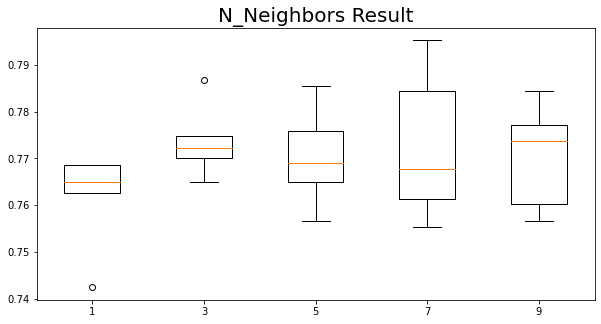

In [90]:
n_neighbors_list = [1, 3, 5, 7, 9]
cnt = 0
res = []
start = time.time()

for nn in n_neighbors_list:
    cnt += 1
    clf = KNeighborsClassifier(n_neighbors=nn)
    accuracy = cross_val_score(clf, X_train_lv, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, N_Neighbors: {nn}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('N_Neighbors Result',fontsize=20)
labels = '1', '3', '5', '7', '9'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.16174602508544922s, Weights: uniform, Accuracy: [0.76895307 0.75662651 0.78554217 0.76506024 0.77590361], Mean: 0.7704171197425078
Index: 2, Time: 0.2246086597442627s, Weights: distance, Accuracy: [0.77737665 0.76746988 0.80361446 0.77710843 0.80240964], Mean: 0.7855958128543054


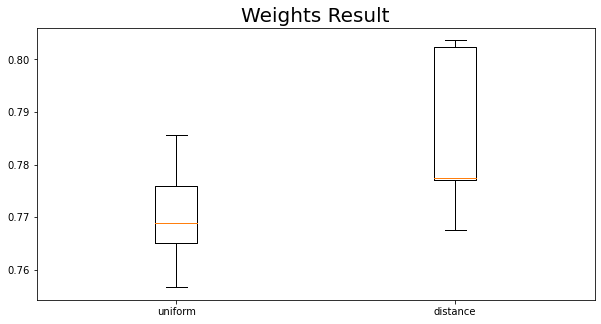

In [91]:
weights_list = ['uniform', 'distance']
cnt = 0
res = []
start = time.time()

for wei in weights_list:
    cnt += 1
    clf = KNeighborsClassifier(weights = wei)
    accuracy = cross_val_score(clf, X_train_lv, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Weights: {wei}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Weights Result',fontsize=20)
labels = 'uniform', 'distance'
plt.boxplot(res, labels = labels)
plt.show()

Index: 1, Time: 0.1624612808227539s, Algorithm: auto, Accuracy: [0.76895307 0.75662651 0.78554217 0.76506024 0.77590361], Mean: 0.7704171197425078
Index: 2, Time: 0.3481271266937256s, Algorithm: ball_tree, Accuracy: [0.77978339 0.76144578 0.79036145 0.7746988  0.77108434], Mean: 0.7754747509895177
Index: 3, Time: 0.497023344039917s, Algorithm: kd_tree, Accuracy: [0.76895307 0.75662651 0.78554217 0.76506024 0.77590361], Mean: 0.7704171197425078
Index: 4, Time: 0.9464342594146729s, Algorithm: brute, Accuracy: [0.7677497  0.7686747  0.77831325 0.77590361 0.7746988 ], Mean: 0.773068012120685


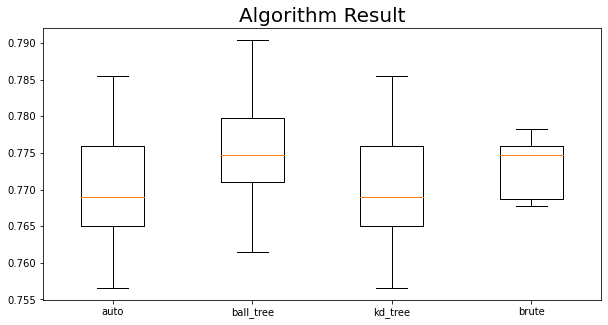

In [92]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
cnt = 0
res = []
start = time.time()

for alg in algorithm_list:
    cnt += 1
    clf = KNeighborsClassifier(algorithm = alg)
    accuracy = cross_val_score(clf, X_train_lv, y_train, scoring='accuracy', cv=5)
    print(f"Index: {cnt}, Time: {time.time()-start}s, Algorithm: {alg}, Accuracy: {accuracy}, Mean: {np.mean(accuracy)}")
    res.append(accuracy)
    # print(res)
    
plt.figure(figsize=(10,5))
plt.title('Algorithm Result',fontsize=20)
labels = 'auto', 'ball_tree', 'kd_tree', 'brute'
plt.boxplot(res, labels = labels)
plt.show()

# Discussion

## Pair 1: H and K

In [113]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [114]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
Pair_1 = np.concatenate((H,K))
X_train, X_val, y_train, y_val = train_test_split(Pair_1[:,1:], Pair_1[:,0], test_size=0.1, random_state=0)

### Method 1: KNN 

In [45]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9391891891891891, Time: 0.01628589630126953s


In [46]:
start = time.time()
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.918918918918919, Time: 0.010161638259887695s


In [47]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.918918918918919, Time: 0.016132354736328125s


### Method 2: Decision Tree 

In [48]:
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9594594594594594, Time: 0.0153656005859375s


In [49]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 30)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9391891891891891, Time: 0.008028507232666016s


### Method 3: Random Forest

In [52]:
start = time.time()
clf = RandomForestClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9594594594594594, Time: 0.21917414665222168s


In [53]:
start = time.time()
clf = RandomForestClassifier(max_depth = 15, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9527027027027027, Time: 0.21585321426391602s


In [54]:
start = time.time()
clf = RandomForestClassifier(n_estimators = 25, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9527027027027027, Time: 0.07050728797912598s


### Method 4: Support Vector Machine

In [55]:
start = time.time()
clf = SVC(kernel = 'poly')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9594594594594594, Time: 0.04722738265991211s


In [57]:
start = time.time()
clf = SVC(C = 1.4)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9527027027027027, Time: 0.03994917869567871s


## Feature extraction (PCA)

In [138]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [139]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
Pair_1 = np.concatenate((H,K))
X, y = Pair_1[:,1:], Pair_1[:,0]

In [140]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.1, random_state=0)

### Method 1: KNN 

In [142]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8513513513513513, Time: 0.009579181671142578s


In [111]:
start = time.time()
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.918918918918919, Time: 0.009538412094116211s


In [126]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8648648648648649, Time: 0.01177525520324707s


### Method 2: Decision Tree

In [127]:
start = time.time()
clf = DecisionTreeClassifier(criterion = 'gini')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8581081081081081, Time: 0.006761074066162109s


In [128]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 25)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8648648648648649, Time: 0.006043195724487305s


### Method 3: Random Forest

In [129]:
start = time.time()
clf = RandomForestClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8783783783783784, Time: 0.32607388496398926s


In [130]:
start = time.time()
clf = RandomForestClassifier(max_depth = 25, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8648648648648649, Time: 0.2603459358215332s


In [131]:
start = time.time()
clf = RandomForestClassifier(n_estimators = 25, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8513513513513513, Time: 0.11377167701721191s


### Method 4: Support Vector Machine

In [132]:
start = time.time()
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8851351351351351, Time: 0.048752784729003906s


In [133]:
start = time.time()
clf = SVC(C = 1.0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.8851351351351351, Time: 0.054361581802368164s


## Pair 2: M and Y

In [143]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [144]:
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
Pair_2 = np.concatenate((M,Y))

In [145]:
X_train, X_val, y_train, y_val = train_test_split(Pair_2[:,1:], Pair_2[:,0], test_size=0.1, random_state=0)

### Method 1: KNN 

In [146]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.0156705379486084s


In [147]:
start = time.time()
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.013114690780639648s


In [148]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.020058393478393555s


### Method 2: Decision Tree

In [149]:
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9936708860759493, Time: 0.004625082015991211s


In [150]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.0077631473541259766s


### Method 3: Random Forest

In [151]:
start = time.time()
clf = RandomForestClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.20600318908691406s


In [152]:
start = time.time()
clf = RandomForestClassifier(max_depth = 6, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.18160748481750488s


In [153]:
start = time.time()
clf = RandomForestClassifier(n_estimators = 15, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.0580296516418457s


### Method 4: Support Vector Machine

In [154]:
start = time.time()
clf = SVC(kernel = 'poly')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.015810728073120117s


In [155]:
start = time.time()
clf = SVC(C = 0.6)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.018185853958129883s


## Feature extraction (PCA)

In [156]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [157]:
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
Pair_2 = np.concatenate((M,Y))
X, y = Pair_2[:,1:], Pair_2[:,0]

In [158]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.1, random_state=0)

### Method 1: KNN 

In [159]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9620253164556962, Time: 0.012729883193969727s


In [160]:
start = time.time()
clf = KNeighborsClassifier(weights = 'uniform')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9620253164556962, Time: 0.009974956512451172s


In [161]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9620253164556962, Time: 0.012001991271972656s


### Method 2: Decision Tree

In [162]:
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9810126582278481, Time: 0.00899648666381836s


In [163]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 15)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9683544303797469, Time: 0.007601499557495117s


### Method 3: Random Forest

In [164]:
start = time.time()
clf = RandomForestClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9810126582278481, Time: 0.2886688709259033s


In [165]:
start = time.time()
clf = RandomForestClassifier(max_depth = 8, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9746835443037974, Time: 0.21904611587524414s


In [166]:
start = time.time()
clf = RandomForestClassifier(n_estimators = 25, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9746835443037974, Time: 0.07282805442810059s


### Method 4: Support Vector Machine

In [167]:
start = time.time()
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9746835443037974, Time: 0.0162656307220459s


In [168]:
start = time.time()
clf = SVC(C = 0.4)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9746835443037974, Time: 0.018136978149414062s


## Pair 3: F and X

### Method 1: KNN 

In [169]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [170]:
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Pair_3 = np.concatenate((F,X))

In [171]:
X_train, X_val, y_train, y_val = train_test_split(Pair_3[:,1:], Pair_3[:,0], test_size=0.1, random_state=0)

### Method 1: KNN 

In [172]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.0201723575592041s


In [173]:
start = time.time()
clf = KNeighborsClassifier(weights = 'uniform')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.018998146057128906s


In [174]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.025595426559448242s


### Method 2: Decision Tree

In [175]:
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9936305732484076, Time: 0.0076444149017333984s


In [176]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9936305732484076, Time: 0.008086204528808594s


### Method 3: Random Forest

In [177]:
start = time.time()
clf = RandomForestClassifier(criterion = 'gini', random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.21799874305725098s


In [178]:
start = time.time()
clf = RandomForestClassifier(max_depth = 10, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.19351696968078613s


In [179]:
start = time.time()
clf = RandomForestClassifier(n_estimators = 10, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.027584314346313477s


### Method 4: Support Vector Machine

In [180]:
start = time.time()
clf = SVC(kernel = 'poly')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.020673513412475586s


In [181]:
start = time.time()
clf = SVC(C = 1.4)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 1.0, Time: 0.024266481399536133s


## Feature extraction (PCA)

In [182]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [183]:
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Pair_3 = np.concatenate((F,X))
X, y = Pair_3[:,1:], Pair_3[:,0]

In [184]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.1, random_state=0)

### Method 1: KNN 

In [185]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9808917197452229, Time: 0.014003515243530273s


In [186]:
start = time.time()
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9808917197452229, Time: 0.00591731071472168s


In [187]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9808917197452229, Time: 0.011586666107177734s


### Method 2: Decision Tree

In [188]:
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9617834394904459, Time: 0.009188175201416016s


In [189]:
start = time.time()
clf = DecisionTreeClassifier(max_depth = 20)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9681528662420382, Time: 0.007165431976318359s


### Method 3: Random Forest 

In [190]:
start = time.time()
clf = RandomForestClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9681528662420382, Time: 0.26651763916015625s


In [191]:
start = time.time()
clf = RandomForestClassifier(max_depth = 10, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9681528662420382, Time: 0.2544827461242676s


In [192]:
start = time.time()
clf = RandomForestClassifier(n_estimators = 10, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9745222929936306, Time: 0.03109145164489746s


### Method 4: Support Vector Machine

In [193]:
start = time.time()
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9808917197452229, Time: 0.025997638702392578s


In [194]:
start = time.time()
clf = SVC(C = 1.0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9808917197452229, Time: 0.02599954605102539s


# Multi-class classification

### Method: KNN 

In [195]:
letter_recognition = pd.read_csv("letter-recognition.data")
letter_recognition = letter_recognition.values

In [196]:
H = letter_recognition[np.where(letter_recognition[:, 0] == 'H')]
K = letter_recognition[np.where(letter_recognition[:, 0] == 'K')]
M = letter_recognition[np.where(letter_recognition[:, 0] == 'M')]
Y = letter_recognition[np.where(letter_recognition[:, 0] == 'Y')]
F = letter_recognition[np.where(letter_recognition[:, 0] == 'F')]
X = letter_recognition[np.where(letter_recognition[:, 0] == 'X')]
Multi_class = np.concatenate((H,K,M,Y,F,X))

In [197]:
X_train, X_val, y_train, y_val = train_test_split(Multi_class[:,1:], Multi_class[:,0], test_size=0.1, random_state=0)

In [198]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9783549783549783, Time: 0.06028485298156738s


In [199]:
start = time.time()
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.974025974025974, Time: 0.06072115898132324s


In [200]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.974025974025974, Time: 0.0809926986694336s


## Simple Quality filtering (Low Variance)

In [201]:
variance_feature_16 = {}
for i in range(16):
    variance_feature_16.update({i: np.var(X_train[:,i])})
variance_feature_16 = sorted(variance_feature_16.items(), key=lambda x: x[1], reverse=True)
print(variance_feature_16)

[(1, 10.806142094033056), (7, 9.32589750180522), (12, 6.993124811783075), (10, 6.206387503401237), (4, 5.711127068323864), (14, 5.392168826045954), (3, 5.278014411518096), (8, 4.892841952036721), (9, 4.846096707866284), (2, 4.621054122788687), (5, 4.369022891042683), (6, 3.977242497316194), (0, 3.7017193803121478), (13, 3.2569238075467464), (11, 3.093783626193684), (15, 2.738035219604702)]


In [202]:
X_train_lv_1 = X_train[:,1]
X_train_lv_7 = X_train[:,7]
X_train_lv_12 = X_train[:,12]
X_train_lv_10 = X_train[:,10]
X_train_lv = np.c_[X_train_lv_1,X_train_lv_7,X_train_lv_12,X_train_lv_10]
print(X_train_lv.shape)

(4151, 4)


In [203]:
start = time.time()
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9805194805194806, Time: 0.06601953506469727s


In [204]:
start = time.time()
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.974025974025974, Time: 0.05411648750305176s


In [205]:
start = time.time()
clf = KNeighborsClassifier(algorithm = 'ball_tree')
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print(f"Accuracy: {accuracy}, Time: {time.time()-start}s")

Accuracy: 0.9718614718614719, Time: 0.06795239448547363s
